In [1]:
import pandas as pd 
import numpy as np 
import plotly.express as px 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
from datasist.structdata import detect_outliers

%matplotlib inline
sns.set(rc={'figure.figsize':(10, 10)}, font_scale=1.2)

In [2]:
df= pd.read_csv(r'sales.csv')
df

Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
1          2  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
2          3  CA-2017-138688  12/06/2017  16/06/2017    Second Class   
3          4  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
4          5  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
...      ...             ...         ...         ...             ...   
9795    9796  CA-2017-125920  21/05/2017  28/05/2017  Standard Class   
9796    9797  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9797    9798  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9798    9799  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9799    9800  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United States        Henderson   
1       CG-12520       Claire Gute   Consumer  United States        Henderson   
2       DV-13045   Darrin Van Huff  Corporate  United States      Los Angeles   
3       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
4       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
...          ...               ...        ...            ...              ...   
9795    SH-19975     Sally Hughsby  Corporate  United States          Chicago   
9796    CS-12490  Cindy Schnelling  Corporate  United States           Toledo   
9797    CS-12490  Cindy Schnelling  Corporate  United States           Toledo   
9798    CS-12490  Cindy Schnelling  Corporate  United States           Toledo   
9799    CS-12490  Cindy Schnelling  Corporate  United States           Toledo   

           State  Postal Code   Region       Product ID         Category  \
0       Kentucky      42420.0    South  FUR-BO-10001798        Furniture   
1       Kentucky      42420.0    South  FUR-CH-10000454        Furniture   
2     California      90036.0     West  OFF-LA-10000240  Office Supplies   
3        Florida      33311.0    South  FUR-TA-10000577        Furniture   
4        Florida      33311.0    South  OFF-ST-10000760  Office Supplies   
...          ...          ...      ...              ...              ...   
9795    Illinois      60610.0  Central  OFF-BI-10003429  Office Supplies   
9796        Ohio      43615.0     East  OFF-AR-10001374  Office Supplies   
9797        Ohio      43615.0     East  TEC-PH-10004977       Technology   
9798        Ohio      43615.0     East  TEC-PH-10000912       Technology   
9799        Ohio      43615.0     East  TEC-AC-10000487       Technology   

     Sub-Category                                       Product Name     Sales  
0       Bookcases                  Bush Somerset Collection Bookcase  261.9600  
1          Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400  
2          Labels  Self-Adhesive Address Labels for Typewriters b...   14.6200  
3          Tables      Bretford CR4500 Series Slim Rectangular Table  957.5775  
4         Storage                     Eldon Fold 'N Roll Cart System   22.3680  
...           ...                                                ...       ...  
9795      Binders  Cardinal HOLDit! Binder Insert Strips,Extra St...    3.7980  
9796          Art           BIC Brite Liner Highlighters, Chisel Tip   10.3680  
9797       Phones                                        GE 30524EE4  235.1880  
9798       Phones           Anker 24W Portable Micro USB Car Charger   26.3760  
9799  Accessories                SanDisk Cruzer 4 GB USB Flash Drive   10.3840  

[9800 rows x 18 columns]

# Data Cleaning and Feature Engineering

In [3]:
#checking missing data
df.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [4]:
#checking duplicates
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
#let's remove spaces from our columns names 
df.columns=df.columns.str.strip()
df.columns = df.columns.str.replace(' ', '')
df

RowID         OrderID   OrderDate    ShipDate        ShipMode  \
0         1  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
1         2  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
2         3  CA-2017-138688  12/06/2017  16/06/2017    Second Class   
3         4  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
4         5  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
...     ...             ...         ...         ...             ...   
9795   9796  CA-2017-125920  21/05/2017  28/05/2017  Standard Class   
9796   9797  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9797   9798  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9798   9799  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9799   9800  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   

     CustomerID      CustomerName    Segment        Country             City  \
0      CG-12520       Claire Gute   Consumer  United States        Henderson   
1      CG-12520       Claire Gute   Consumer  United States        Henderson   
2      DV-13045   Darrin Van Huff  Corporate  United States      Los Angeles   
3      SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
4      SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
...         ...               ...        ...            ...              ...   
9795   SH-19975     Sally Hughsby  Corporate  United States          Chicago   
9796   CS-12490  Cindy Schnelling  Corporate  United States           Toledo   
9797   CS-12490  Cindy Schnelling  Corporate  United States           Toledo   
9798   CS-12490  Cindy Schnelling  Corporate  United States           Toledo   
9799   CS-12490  Cindy Schnelling  Corporate  United States           Toledo   

           State  PostalCode   Region        ProductID         Category  \
0       Kentucky     42420.0    South  FUR-BO-10001798        Furniture   
1       Kentucky     42420.0    South  FUR-CH-10000454        Furniture   
2     California     90036.0     West  OFF-LA-10000240  Office Supplies   
3        Florida     33311.0    South  FUR-TA-10000577        Furniture   
4        Florida     33311.0    South  OFF-ST-10000760  Office Supplies   
...          ...         ...      ...              ...              ...   
9795    Illinois     60610.0  Central  OFF-BI-10003429  Office Supplies   
9796        Ohio     43615.0     East  OFF-AR-10001374  Office Supplies   
9797        Ohio     43615.0     East  TEC-PH-10004977       Technology   
9798        Ohio     43615.0     East  TEC-PH-10000912       Technology   
9799        Ohio     43615.0     East  TEC-AC-10000487       Technology   

     Sub-Category                                        ProductName     Sales  
0       Bookcases                  Bush Somerset Collection Bookcase  261.9600  
1          Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400  
2          Labels  Self-Adhesive Address Labels for Typewriters b...   14.6200  
3          Tables      Bretford CR4500 Series Slim Rectangular Table  957.5775  
4         Storage                     Eldon Fold 'N Roll Cart System   22.3680  
...           ...                                                ...       ...  
9795      Binders  Cardinal HOLDit! Binder Insert Strips,Extra St...    3.7980  
9796          Art           BIC Brite Liner Highlighters, Chisel Tip   10.3680  
9797       Phones                                        GE 30524EE4  235.1880  
9798       Phones           Anker 24W Portable Micro USB Car Charger   26.3760  
9799  Accessories                SanDisk Cruzer 4 GB USB Flash Drive   10.3840  

[9800 rows x 18 columns]

In [7]:
# i want to see if product name has a high varience so i will drop it
df['ProductName'].value_counts()

ProductName
Staple envelope                                                        47
Staples                                                                46
Easy-staple paper                                                      44
Avery Non-Stick Binders                                                20
Staples in misc. colors                                                18
                                                                       ..
Xiaomi Mi3                                                              1
Universal Ultra Bright White Copier/Laser Paper, 8 1/2" x 11", Ream     1
Socket Bluetooth Cordless Hand Scanner (CHS)                            1
Logitech Illuminated Ultrathin Keyboard with Backlighting               1
LG G2                                                                   1
Name: count, Length: 1849, dtype: int64

In [8]:
#let's drop unused columns & reset index
df.drop(['RowID','OrderID','CustomerName','PostalCode','ProductID','ProductName'],axis=1,inplace=True)
df.reset_index(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         9800 non-null   int64  
 1   OrderDate     9800 non-null   object 
 2   ShipDate      9800 non-null   object 
 3   ShipMode      9800 non-null   object 
 4   CustomerID    9800 non-null   object 
 5   Segment       9800 non-null   object 
 6   Country       9800 non-null   object 
 7   City          9800 non-null   object 
 8   State         9800 non-null   object 
 9   Region        9800 non-null   object 
 10  Category      9800 non-null   object 
 11  Sub-Category  9800 non-null   object 
 12  Sales         9800 non-null   float64
dtypes: float64(1), int64(1), object(11)
memory usage: 995.4+ KB


In [10]:
# As you can see columns "Order Date" and "Ship Date"  type is 'object' so....
#let's convert them to 'date time' type
df['ShipDate']= pd.to_datetime(df['ShipDate'],format='%d/%m/%Y',errors='coerce')
df['OrderDate']= pd.to_datetime(df['OrderDate'],format='%d/%m/%Y',errors='coerce')

In [11]:
# one more time let's check missing 
df.isnull().sum()

index           0
OrderDate       0
ShipDate        0
ShipMode        0
CustomerID      0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
dtype: int64

In [12]:
# let's see how much time it take to ship the order 
df['response']=df['ShipDate']-df['OrderDate']

In [13]:
df

index  OrderDate   ShipDate        ShipMode CustomerID    Segment  \
0         0 2017-11-08 2017-11-11    Second Class   CG-12520   Consumer   
1         1 2017-11-08 2017-11-11    Second Class   CG-12520   Consumer   
2         2 2017-06-12 2017-06-16    Second Class   DV-13045  Corporate   
3         3 2016-10-11 2016-10-18  Standard Class   SO-20335   Consumer   
4         4 2016-10-11 2016-10-18  Standard Class   SO-20335   Consumer   
...     ...        ...        ...             ...        ...        ...   
9795   9795 2017-05-21 2017-05-28  Standard Class   SH-19975  Corporate   
9796   9796 2016-01-12 2016-01-17  Standard Class   CS-12490  Corporate   
9797   9797 2016-01-12 2016-01-17  Standard Class   CS-12490  Corporate   
9798   9798 2016-01-12 2016-01-17  Standard Class   CS-12490  Corporate   
9799   9799 2016-01-12 2016-01-17  Standard Class   CS-12490  Corporate   

            Country             City       State   Region         Category  \
0     United States        Henderson    Kentucky    South        Furniture   
1     United States        Henderson    Kentucky    South        Furniture   
2     United States      Los Angeles  California     West  Office Supplies   
3     United States  Fort Lauderdale     Florida    South        Furniture   
4     United States  Fort Lauderdale     Florida    South  Office Supplies   
...             ...              ...         ...      ...              ...   
9795  United States          Chicago    Illinois  Central  Office Supplies   
9796  United States           Toledo        Ohio     East  Office Supplies   
9797  United States           Toledo        Ohio     East       Technology   
9798  United States           Toledo        Ohio     East       Technology   
9799  United States           Toledo        Ohio     East       Technology   

     Sub-Category     Sales response  
0       Bookcases  261.9600   3 days  
1          Chairs  731.9400   3 days  
2          Labels   14.6200   4 days  
3          Tables  957.5775   7 days  
4         Storage   22.3680   7 days  
...           ...       ...      ...  
9795      Binders    3.7980   7 days  
9796          Art   10.3680   5 days  
9797       Phones  235.1880   5 days  
9798       Phones   26.3760   5 days  
9799  Accessories   10.3840   5 days  

[9800 rows x 14 columns]

In [14]:
# Now let's add day,month and year columns
df['Year'] = df['OrderDate'].dt.year
df['Month_Name'] = df['OrderDate'].dt.month_name()
df['Day_Name'] = df['OrderDate'].dt.day_name()
df['Month'] = df['OrderDate'].dt.month

In [15]:
#let's make a column for season
def map_months(x):
    if x in [12, 1, 2]:
        return 'Winter'
    elif x in [3, 4, 5]:
        return 'Spring'
    elif x in [6, 7, 8]:
        return 'Summer'
    elif x in [9, 10, 11]:
        return 'Autumn'

df['Season'] = df['Month'].apply(map_months)

In [16]:
df

index  OrderDate   ShipDate        ShipMode CustomerID    Segment  \
0         0 2017-11-08 2017-11-11    Second Class   CG-12520   Consumer   
1         1 2017-11-08 2017-11-11    Second Class   CG-12520   Consumer   
2         2 2017-06-12 2017-06-16    Second Class   DV-13045  Corporate   
3         3 2016-10-11 2016-10-18  Standard Class   SO-20335   Consumer   
4         4 2016-10-11 2016-10-18  Standard Class   SO-20335   Consumer   
...     ...        ...        ...             ...        ...        ...   
9795   9795 2017-05-21 2017-05-28  Standard Class   SH-19975  Corporate   
9796   9796 2016-01-12 2016-01-17  Standard Class   CS-12490  Corporate   
9797   9797 2016-01-12 2016-01-17  Standard Class   CS-12490  Corporate   
9798   9798 2016-01-12 2016-01-17  Standard Class   CS-12490  Corporate   
9799   9799 2016-01-12 2016-01-17  Standard Class   CS-12490  Corporate   

            Country             City       State   Region         Category  \
0     United States        Henderson    Kentucky    South        Furniture   
1     United States        Henderson    Kentucky    South        Furniture   
2     United States      Los Angeles  California     West  Office Supplies   
3     United States  Fort Lauderdale     Florida    South        Furniture   
4     United States  Fort Lauderdale     Florida    South  Office Supplies   
...             ...              ...         ...      ...              ...   
9795  United States          Chicago    Illinois  Central  Office Supplies   
9796  United States           Toledo        Ohio     East  Office Supplies   
9797  United States           Toledo        Ohio     East       Technology   
9798  United States           Toledo        Ohio     East       Technology   
9799  United States           Toledo        Ohio     East       Technology   

     Sub-Category     Sales response  Year Month_Name   Day_Name  Month  \
0       Bookcases  261.9600   3 days  2017   November  Wednesday     11   
1          Chairs  731.9400   3 days  2017   November  Wednesday     11   
2          Labels   14.6200   4 days  2017       June     Monday      6   
3          Tables  957.5775   7 days  2016    October    Tuesday     10   
4         Storage   22.3680   7 days  2016    October    Tuesday     10   
...           ...       ...      ...   ...        ...        ...    ...   
9795      Binders    3.7980   7 days  2017        May     Sunday      5   
9796          Art   10.3680   5 days  2016    January    Tuesday      1   
9797       Phones  235.1880   5 days  2016    January    Tuesday      1   
9798       Phones   26.3760   5 days  2016    January    Tuesday      1   
9799  Accessories   10.3840   5 days  2016    January    Tuesday      1   

      Season  
0     Autumn  
1     Autumn  
2     Summer  
3     Autumn  
4     Autumn  
...      ...  
9795  Spring  
9796  Winter  
9797  Winter  
9798  Winter  
9799  Winter  

[9800 rows x 19 columns]

# Univariate analysis

In [17]:
df.describe()

index                      OrderDate  \
count  9800.000000                           9800   
mean   4899.500000  2017-05-01 05:13:51.673469440   
min       0.000000            2015-01-03 00:00:00   
25%    2449.750000            2016-05-24 00:00:00   
50%    4899.500000            2017-06-26 00:00:00   
75%    7349.250000            2018-05-15 00:00:00   
max    9799.000000            2018-12-30 00:00:00   
std    2829.160653                            NaN   

                            ShipDate         Sales                   response  \
count                           9800   9800.000000                       9800   
mean   2017-05-05 04:17:52.653061120    230.769059  3 days 23:04:00.979591836   
min              2015-01-07 00:00:00      0.444000            0 days 00:00:00   
25%              2016-05-27 18:00:00     17.248000            3 days 00:00:00   
50%              2017-06-29 00:00:00     54.490000            4 days 00:00:00   
75%              2018-05-19 00:00:00    210.605000            5 days 00:00:00   
max              2019-01-05 00:00:00  22638.480000            7 days 00:00:00   
std                              NaN    626.651875  1 days 17:59:26.617201004   

              Year        Month  
count  9800.000000  9800.000000  
mean   2016.724184     7.818469  
min    2015.000000     1.000000  
25%    2016.000000     5.000000  
50%    2017.000000     9.000000  
75%    2018.000000    11.000000  
max    2018.000000    12.000000  
std       1.123984     3.281905

In [18]:
for col in df.select_dtypes('object').columns:
    print(df[col].value_counts())
    print('='*50)

ShipMode
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: count, dtype: int64
CustomerID
WB-21850    35
MA-17560    34
PP-18955    34
JL-15835    33
CK-12205    32
            ..
JR-15700     1
CJ-11875     1
SC-20845     1
RE-19405     1
AO-10810     1
Name: count, Length: 793, dtype: int64
Segment
Consumer       5101
Corporate      2953
Home Office    1746
Name: count, dtype: int64
Country
United States    9800
Name: count, dtype: int64
City
New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
                ... 
San Mateo          1
Cheyenne           1
Conway             1
Melbourne          1
Springdale         1
Name: count, Length: 529, dtype: int64
State
California              1946
New York                1097
Texas                    973
Pennsylvania             582
Washington               504
Illinois                 483
Ohio                     454
Florida                 

In [19]:
# i noted that in 'ship mode' there is a value called 'same day' so the response should equal 0 
df[df['ShipMode']=='Same Day']['response'].value_counts()

response
0 days    514
1 days     24
Name: count, dtype: int64

In [20]:
#let's have  alook on them
df.loc[(df.ShipMode== 'Same Day') & (df.response =='1 days')]

index  OrderDate   ShipDate  ShipMode CustomerID      Segment  \
1473   1473 2016-12-01 2016-12-02  Same Day   NM-18520     Consumer   
2348   2348 2018-12-02 2018-12-03  Same Day   AM-10360    Corporate   
2349   2349 2018-12-02 2018-12-03  Same Day   AM-10360    Corporate   
2350   2350 2018-12-02 2018-12-03  Same Day   AM-10360    Corporate   
2351   2351 2018-12-02 2018-12-03  Same Day   AM-10360    Corporate   
2352   2352 2018-12-02 2018-12-03  Same Day   AM-10360    Corporate   
3041   3041 2018-09-11 2018-09-12  Same Day   KF-16285  Home Office   
3042   3042 2018-09-11 2018-09-12  Same Day   KF-16285  Home Office   
3043   3043 2018-09-11 2018-09-12  Same Day   KF-16285  Home Office   
3440   3440 2016-11-29 2016-11-30  Same Day   PO-19195  Home Office   
4121   4121 2018-05-11 2018-05-12  Same Day   LP-17080     Consumer   
4122   4122 2018-05-11 2018-05-12  Same Day   LP-17080     Consumer   
4123   4123 2018-05-11 2018-05-12  Same Day   LP-17080     Consumer   
4768   4768 2018-06-02 2018-06-03  Same Day   CS-11860     Consumer   
4822   4822 2017-07-10 2017-07-11  Same Day   NZ-18565  Home Office   
5885   5885 2015-10-16 2015-10-17  Same Day   LS-17245     Consumer   
5886   5886 2015-10-16 2015-10-17  Same Day   LS-17245     Consumer   
8769   8769 2017-09-12 2017-09-13  Same Day   PO-19180  Home Office   
8770   8770 2017-09-12 2017-09-13  Same Day   PO-19180  Home Office   
9003   9003 2016-04-05 2016-04-06  Same Day   JF-15415     Consumer   
9004   9004 2016-04-05 2016-04-06  Same Day   JF-15415     Consumer   
9529   9529 2018-03-24 2018-03-25  Same Day   AC-10615    Corporate   
9717   9717 2017-05-30 2017-05-31  Same Day   AT-10735     Consumer   
9718   9718 2017-05-30 2017-05-31  Same Day   AT-10735     Consumer   

            Country           City           State   Region         Category  \
1473  United States        Houston           Texas  Central        Furniture   
2348  United States    Los Angeles      California     West  Office Supplies   
2349  United States    Los Angeles      California     West  Office Supplies   
2350  United States    Los Angeles      California     West  Office Supplies   
2351  United States    Los Angeles      California     West  Office Supplies   
2352  United States    Los Angeles      California     West  Office Supplies   
3041  United States     Long Beach      California     West  Office Supplies   
3042  United States     Long Beach      California     West  Office Supplies   
3043  United States     Long Beach      California     West        Furniture   
3440  United States  San Francisco      California     West  Office Supplies   
4121  United States        Seattle      Washington     West  Office Supplies   
4122  United States        Seattle      Washington     West  Office Supplies   
4123  United States        Seattle      Washington     West  Office Supplies   
4768  United States   Jacksonville  North Carolina    South  Office Supplies   
4822  United States           Yuma         Arizona     West  Office Supplies   
5885  United States  San Francisco      California     West  Office Supplies   
5886  United States  San Francisco      California     West       Technology   
8769  United States     Louisville        Colorado     West       Technology   
8770  United States     Louisville        Colorado     West        Furniture   
9003  United States        Spokane      Washington     West       Technology   
9004  United States        Spokane      Washington     West  Office Supplies   
9529  United States       Beaumont           Texas  Central  Office Supplies   
9717  United States        Houston           Texas  Central       Technology   
9718  United States        Houston           Texas  Central       Technology   

     Sub-Category     Sales response  Year Month_Name  Day_Name  Month  Season  
1473  Furnishings     6.688   1 days  2016   December  Thursday     12  Winter  
2348      Binders     9.024   1 days  2018   December    Sunday    

In [21]:
#Let's remove the 1 day from 'same day '
bv= (df['ShipMode'] == 'Same Day') & (df['response'] == '1 days')
df.loc[bv, 'ShipMode'] = 'First Class'

In [22]:
df[df['ShipMode']=='Same Day']['response'].value_counts()

response
0 days    514
Name: count, dtype: int64

<Axes: xlabel='Month_Name', ylabel='count'>

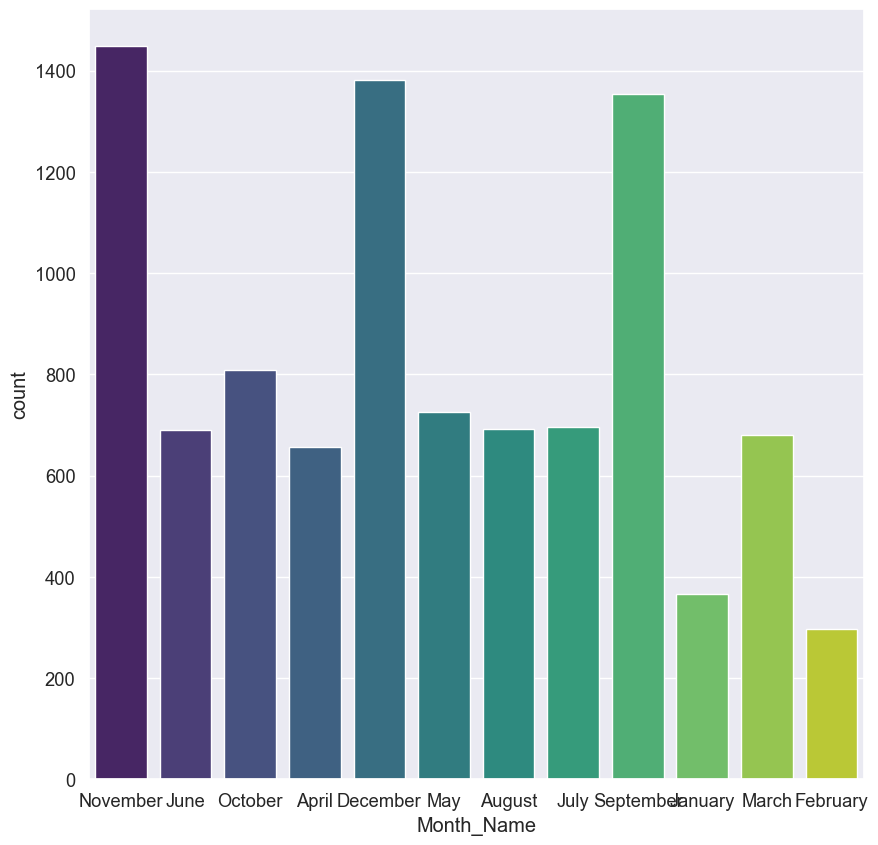

In [23]:
#let's see the most month that has the biggest number of orders 
sns.countplot(x='Month_Name', data=df, palette='viridis')

<Axes: xlabel='Day_Name', ylabel='count'>

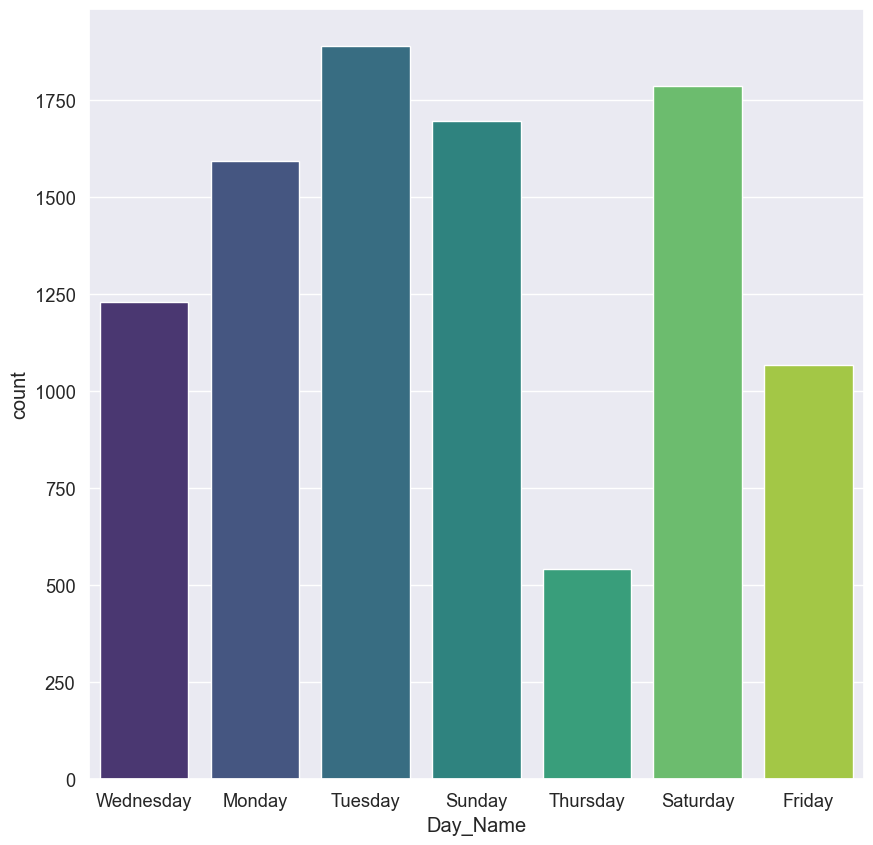

In [24]:
#let's see the most day that has the biggest number of orders 
sns.countplot(x='Day_Name', data=df, palette='viridis')

<Axes: xlabel='Year', ylabel='count'>

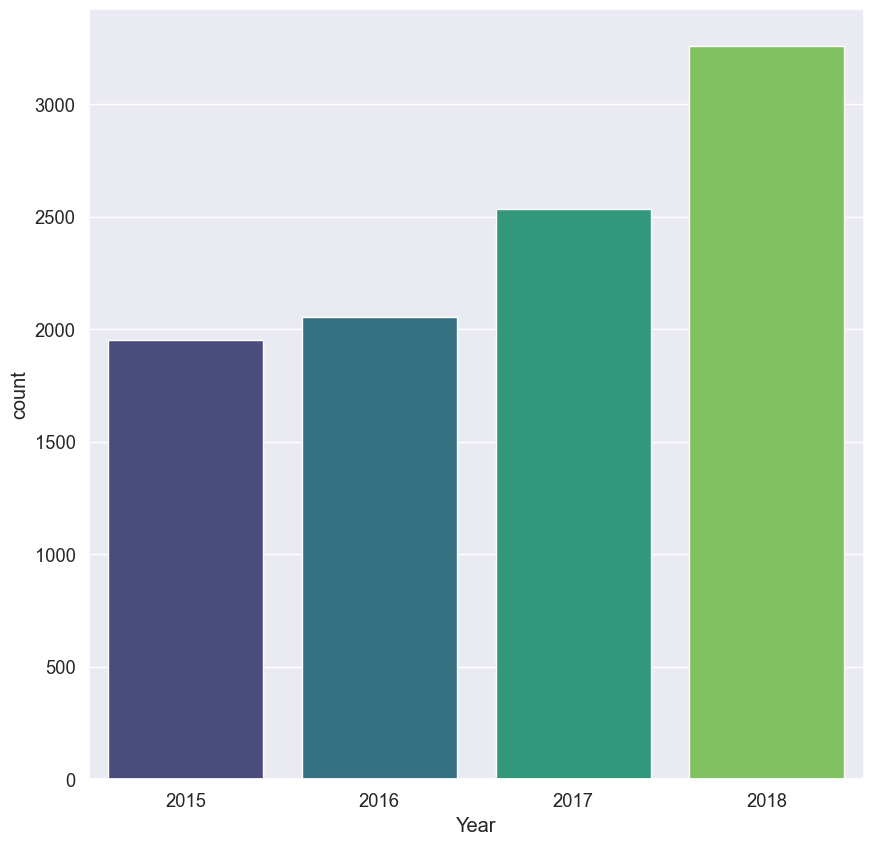

In [25]:
#let's see the most year that has the biggest number of orders 
sns.countplot(x='Year', data=df, palette='viridis')

<Axes: xlabel='Season', ylabel='count'>

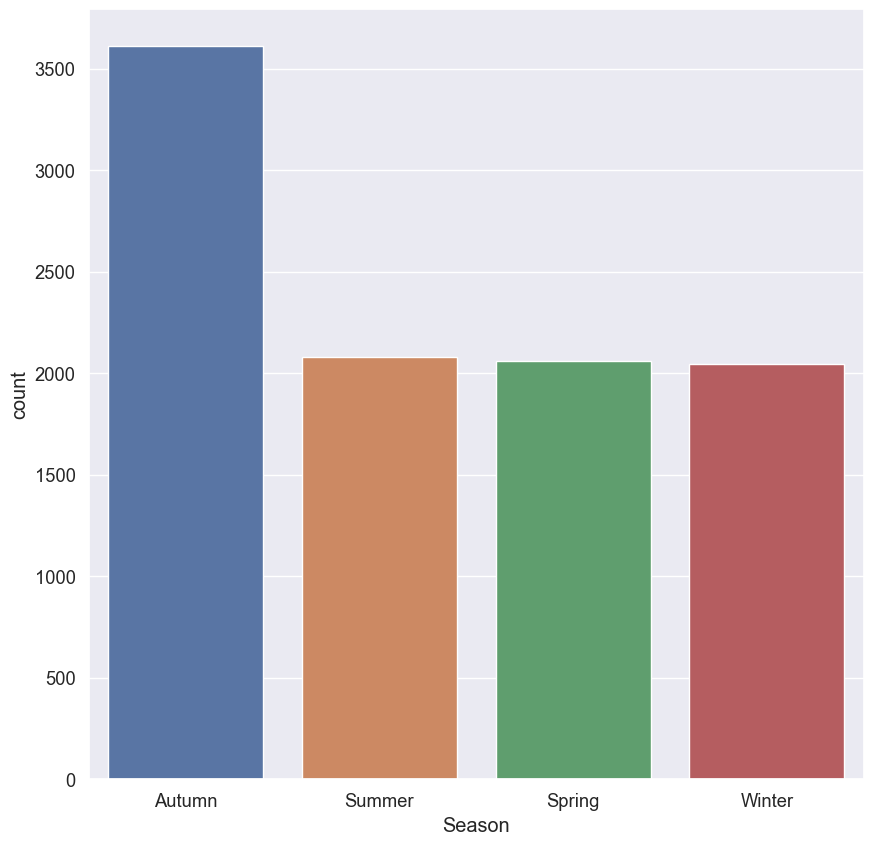

In [26]:
#let's see the most season that has the biggest number of orders
sns.countplot(x='Season', data=df)

In [27]:
#let's see the pie for our 'segment' col
px.pie(data_frame=df , names=df['Segment'])

<Axes: xlabel='count', ylabel='State'>

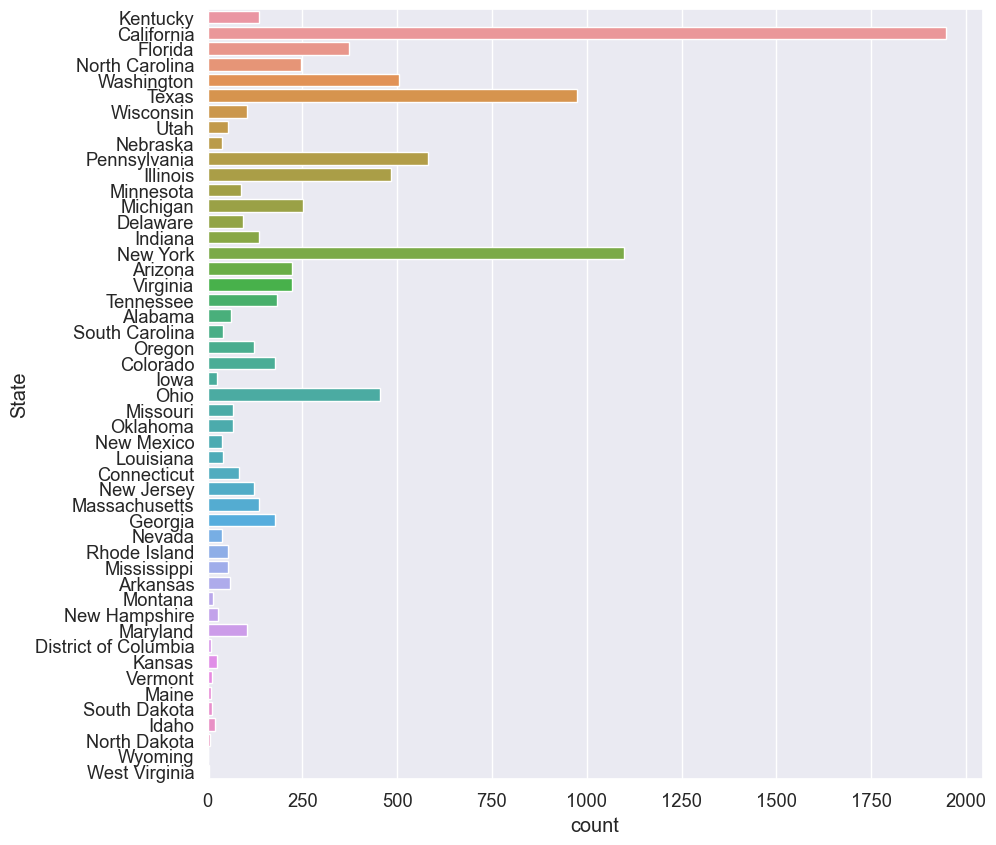

In [28]:
#let's see the most state has the high number of orders
sns.countplot(y='State', data=df)

<Axes: xlabel='count', ylabel='response'>

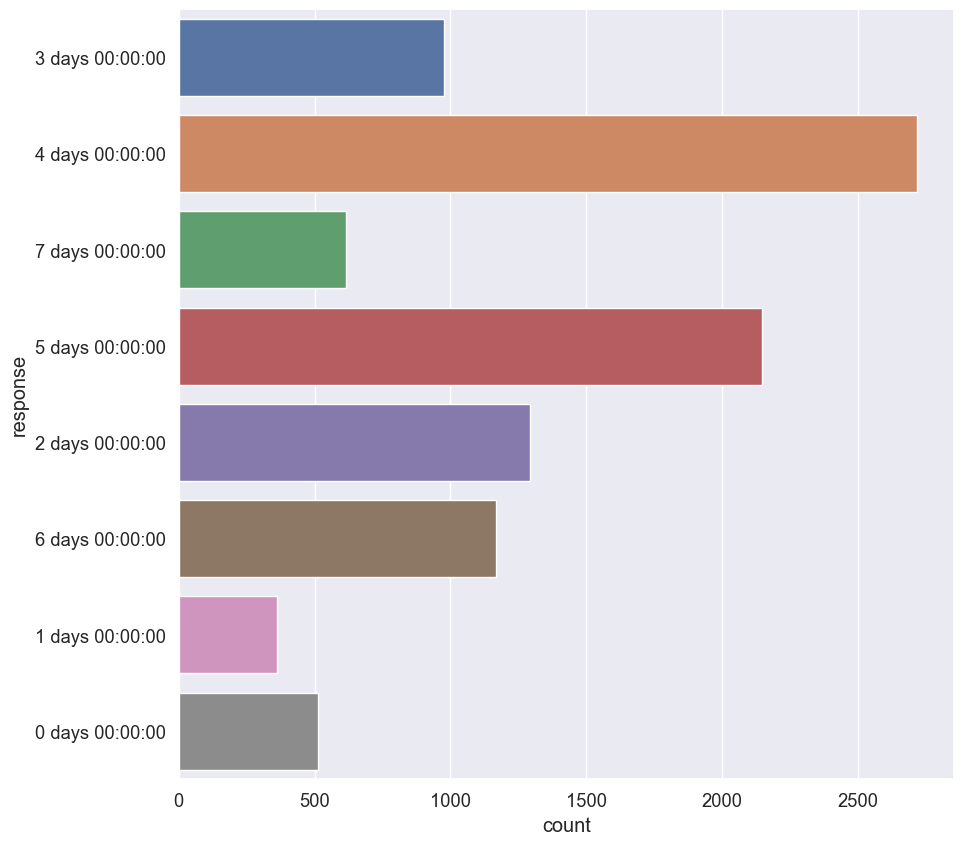

In [29]:
# order shiped after how many days ?
sns.countplot(y='response', data=df)

In [30]:
#let's see the pie for our 'Sub-Category' col
px.pie(data_frame=df , names=df['Sub-Category'])

In [31]:
#let's see the pie for our 'Sub-Category' col
px.pie(data_frame=df , names=df['Category'])

In [32]:
#let's see the pie for our 'Region' col
px.pie(data_frame=df , names=df['Region'])

In [33]:
#let's see the pie for our 'ShipMode' col
px.pie(data_frame=df , names=df['ShipMode'])

In [34]:
# let's the histogram for our sales col.
px.histogram(data_frame=df , x=df['Sales'])

<Axes: xlabel='Sales'>

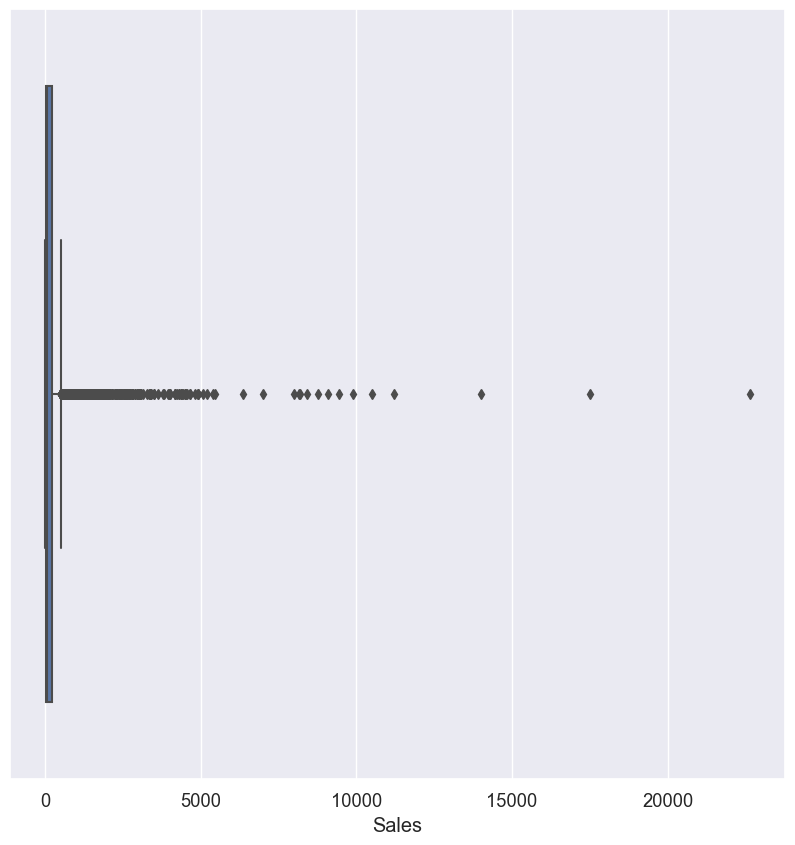

In [35]:
#detecting outliers
sns.boxplot(data=df,x='Sales')

<Axes: xlabel='Sales', ylabel='Count'>

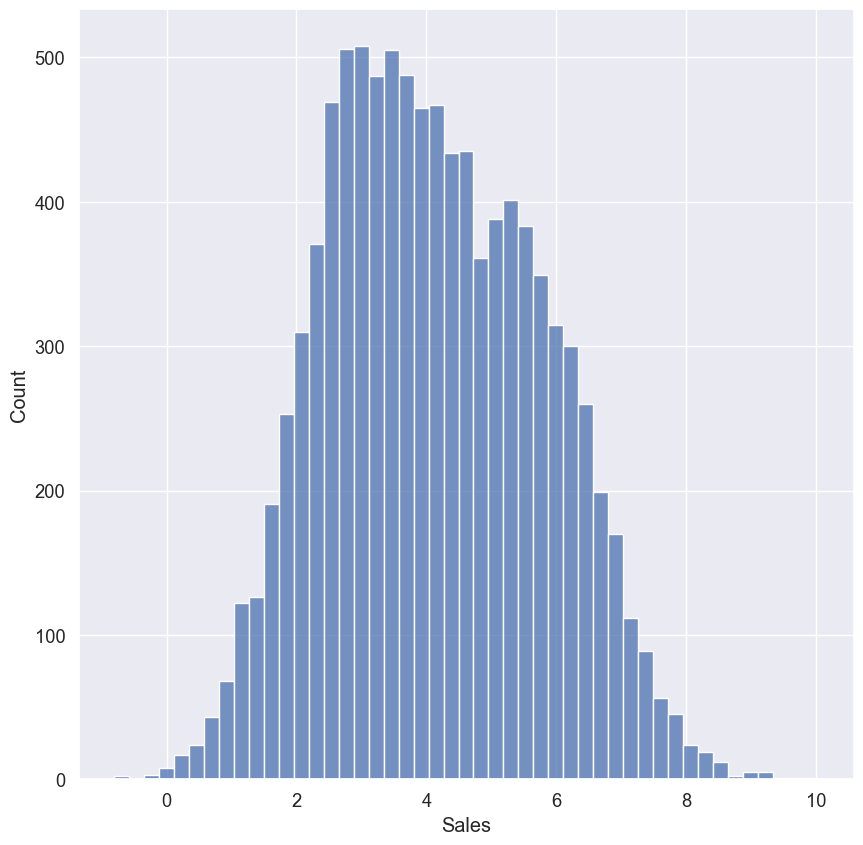

In [36]:
# we made log to make it in the normal distruption 
sns.histplot(data=df,x=np.log(df['Sales']))

In [37]:
# checking that there is no 'infinite'
np.log(df['Sales']).value_counts()

Sales
2.561868    55
2.744189    39
2.967333    39
2.338724    35
3.255015    34
            ..
5.826401     1
4.095144     1
1.613828     1
2.061405     1
2.340266     1
Name: count, Length: 5757, dtype: int64

<Axes: xlabel='Sales'>

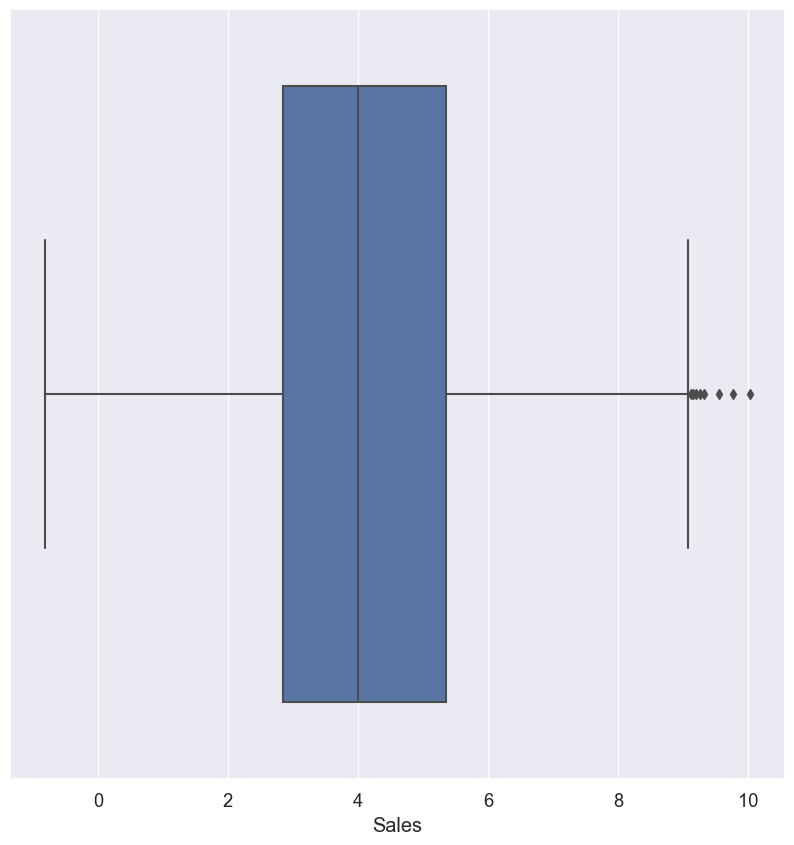

In [38]:
#checking on the outliers after log
sns.boxplot(data=df,x=np.log(df['Sales']))

<Axes: xlabel='Sales'>

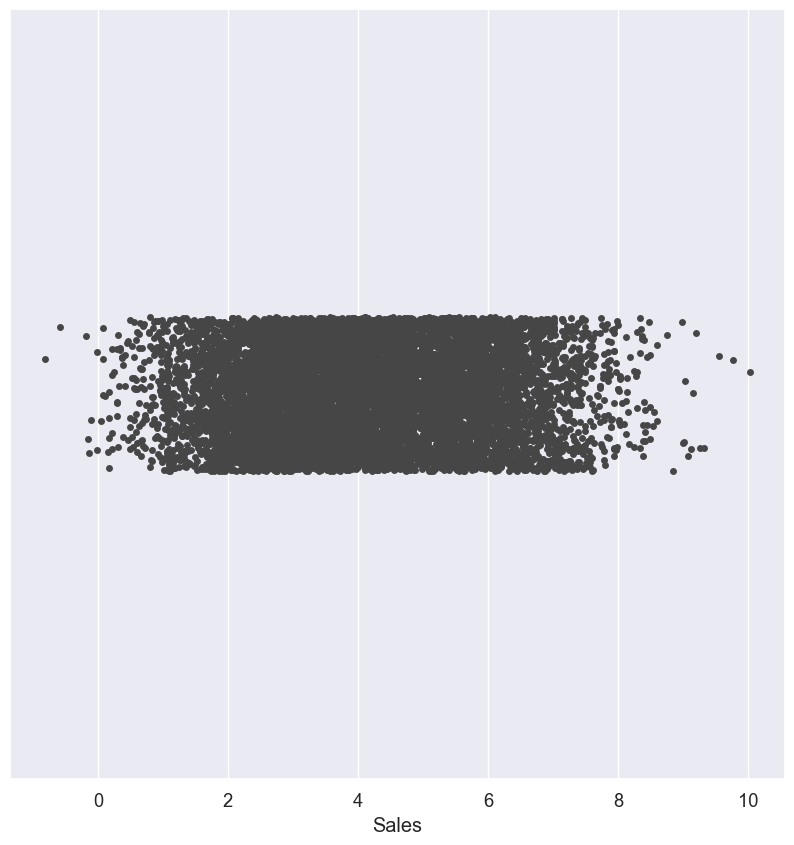

In [39]:
sns.stripplot(x=np.log(df['Sales']), data=df, color="#474646")

In [40]:
#adding log sales col.
df['log_sales']=np.log(df['Sales'])

In [41]:
# detect outliers values
idx = detect_outliers(df, 0, ['log_sales'])
outliers = df.loc[idx]

In [42]:
outliers

index  OrderDate   ShipDate        ShipMode CustomerID      Segment  \
2623   2623 2018-10-22 2018-10-24     First Class   TA-21385  Home Office   
2697   2697 2015-03-18 2015-03-23  Standard Class   SM-20320  Home Office   
4098   4098 2015-09-23 2015-09-28  Standard Class   SC-20095     Consumer   
4190   4190 2018-11-17 2018-11-22  Standard Class   HL-15040     Consumer   
4277   4277 2017-04-16 2017-04-20  Standard Class   BS-11365    Corporate   
6826   6826 2017-10-02 2017-10-09  Standard Class   TC-20980    Corporate   
8153   8153 2018-03-23 2018-03-25     First Class   RB-19360     Consumer   
9039   9039 2017-12-17 2017-12-21  Standard Class   AB-10105     Consumer   

            Country           City       State   Region         Category  \
2623  United States  New York City    New York     East       Technology   
2697  United States   Jacksonville     Florida    South       Technology   
4098  United States    Minneapolis   Minnesota  Central  Office Supplies   
4190  United States         Newark    Delaware     East       Technology   
4277  United States       Lakewood  New Jersey     East       Technology   
6826  United States      Lafayette     Indiana  Central       Technology   
8153  United States        Seattle  Washington     West       Technology   
9039  United States        Detroit    Michigan  Central  Office Supplies   

     Sub-Category      Sales response  Year Month_Name   Day_Name  Month  \
2623      Copiers  11199.968   2 days  2018    October     Monday     10   
2697     Machines  22638.480   5 days  2015      March  Wednesday      3   
4098      Binders   9449.950   5 days  2015  September  Wednesday      9   
4190      Copiers  10499.970   5 days  2018   November   Saturday     11   
4277     Machines   9099.930   4 days  2017      April     Sunday      4   
6826      Copiers  17499.950   7 days  2017    October     Monday     10   
8153      Copiers  13999.960   2 days  2018      March     Friday      3   
9039      Binders   9892.740   4 days  2017   December     Sunday     12   

      Season  log_sales  
2623  Autumn   9.323666  
2697  Spring  10.027406  
4098  Autumn   9.153765  
4190  Autumn   9.259128  
4277  Spring   9.116022  
6826  Autumn   9.769953  
8153  Spring   9.546810  
9039  Winter   9.199556

In [43]:
#removing outliers , i wouldn't remove them because they are not for the same client 
#df.drop(idx , axis = 0 , inplace = True )
#df.reset_index(inplace = True , drop = True )

# Bivariate analysis

C:\Users\XXX\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



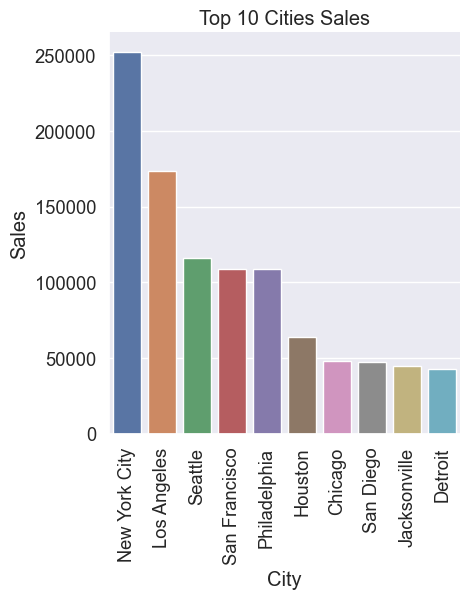

In [44]:
# let's see top 10 cities sells
city_sales = df.groupby('City')['Sales'].sum().round().reset_index().sort_values('Sales', ascending=False).head(10)
sns.catplot(data=city_sales, x='City', y='Sales', kind='bar')
plt.title('Top 10 Cities Sales')
# x.tickets to rotate the text in x axis 
plt.xticks(rotation=90)
plt.show()

C:\Users\XXX\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



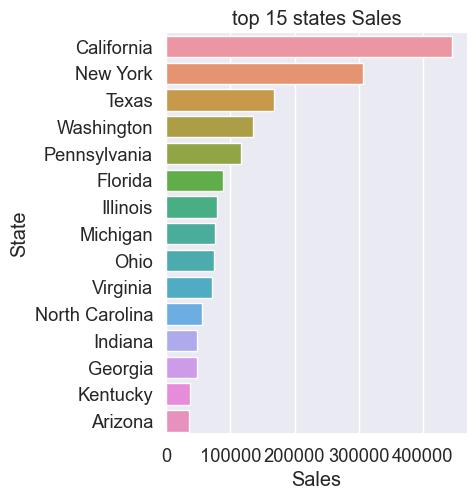

In [45]:
#Let's see the sales in top 15 state 
states_sales = df.groupby('State')['Sales'].sum().round().reset_index().sort_values('Sales', ascending=False).head(15)
sns.catplot(data=states_sales, x='Sales', y='State', kind='bar')
plt.title('top 15 states Sales')
plt.show()

C:\Users\XXX\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



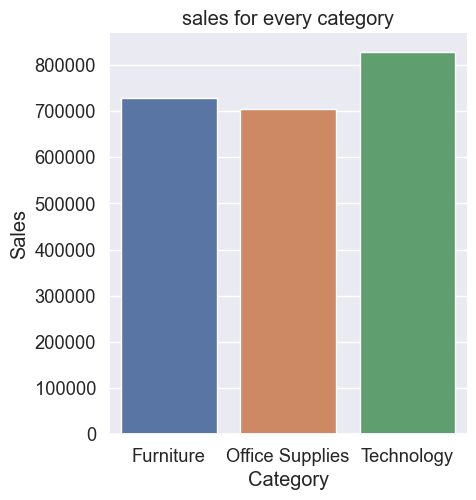

In [46]:
# let's the sales for every catagory
agg_df1 = df.groupby('Category').agg({'Sales':'sum'}).reset_index().sort_values('Category')
sns.catplot(data=agg_df1, x='Category', y='Sales', kind='bar')
plt.title('sales for every category')
plt.show()

In [47]:
# i need to see the behavoir for every product in sup category
agg_df = df.groupby(['OrderDate','Sub-Category']).agg({'Sales':'sum'}).reset_index().sort_values(['Sub-Category','OrderDate'])

In [48]:
agg_df

OrderDate Sub-Category     Sales
13   2015-01-09  Accessories    31.200
18   2015-01-13  Accessories   646.740
27   2015-01-15  Accessories   149.950
60   2015-02-01  Accessories   468.900
70   2015-02-07  Accessories   115.360
...         ...          ...       ...
6339 2018-12-10       Tables  1669.600
6350 2018-12-11       Tables   721.875
6366 2018-12-14       Tables  1501.570
6423 2018-12-22       Tables  2136.826
6452 2018-12-25       Tables   273.060

[6480 rows x 3 columns]

In [49]:
# let's make a pivot table to make it easy 
total_sales_df = agg_df.pivot(index='OrderDate',columns='Sub-Category', values='Sales')
total_sales_df.head()

Sub-Category  Accessories  Appliances     Art  Binders  Bookcases   Chairs  \
OrderDate                                                                    
2015-01-03            NaN         NaN     NaN      NaN        NaN      NaN   
2015-01-04            NaN         NaN     NaN     3.54        NaN      NaN   
2015-01-05            NaN         NaN  19.536      NaN        NaN      NaN   
2015-01-06            NaN         NaN  18.260   609.98        NaN  2573.82   
2015-01-07            NaN         NaN     NaN    10.43        NaN      NaN   

Sub-Category  Copiers  Envelopes  Fasteners  Furnishings  Labels  Machines  \
OrderDate                                                                    
2015-01-03        NaN        NaN        NaN          NaN     NaN       NaN   
2015-01-04        NaN        NaN        NaN          NaN  11.784       NaN   
2015-01-05        NaN        NaN        NaN          NaN     NaN       NaN   
2015-01-06        NaN        NaN      31.12          NaN     NaN       NaN   
2015-01-07        NaN        NaN        NaN       76.728     NaN       NaN   

Sub-Category   Paper   Phones  Storage  Supplies  Tables  
OrderDate                                                 
2015-01-03    16.448      NaN      NaN       NaN     NaN  
2015-01-04       NaN      NaN  272.736       NaN     NaN  
2015-01-05       NaN      NaN      NaN       NaN     NaN  
2015-01-06    25.980  1147.94      NaN       NaN     NaN  
2015-01-07       NaN      NaN      NaN       NaN     NaN

In [50]:
#let's fill nan valuses with 0
total_sales_df.fillna(0,inplace=True)

In [51]:
# let's check nan valuse
total_sales_df.isna().sum()

Sub-Category
Accessories    0
Appliances     0
Art            0
Binders        0
Bookcases      0
Chairs         0
Copiers        0
Envelopes      0
Fasteners      0
Furnishings    0
Labels         0
Machines       0
Paper          0
Phones         0
Storage        0
Supplies       0
Tables         0
dtype: int64

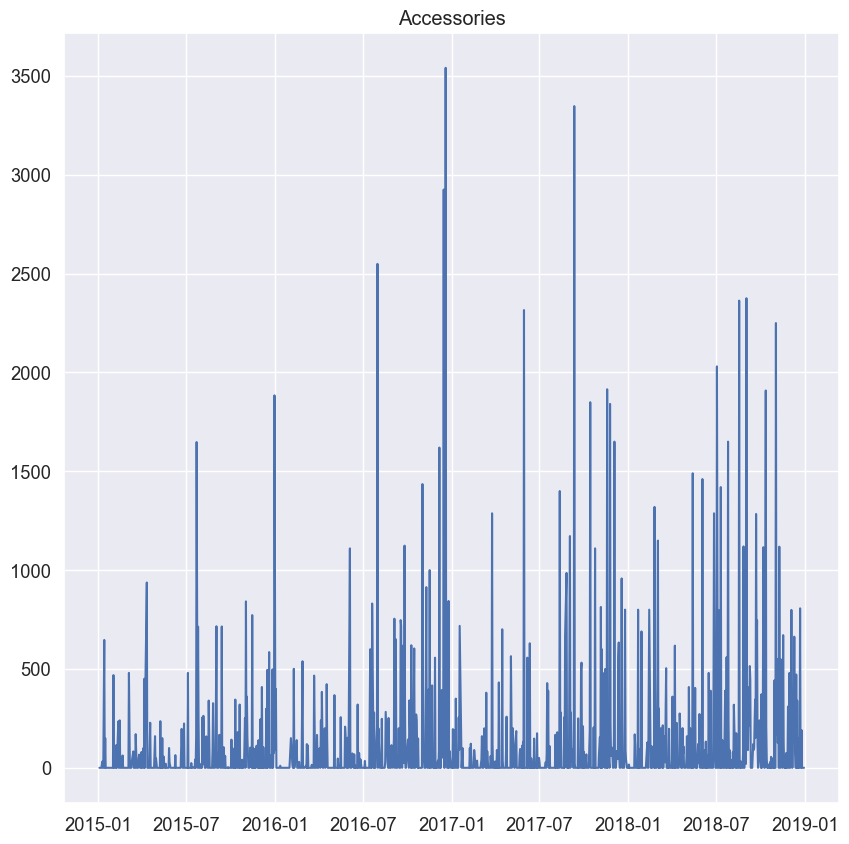

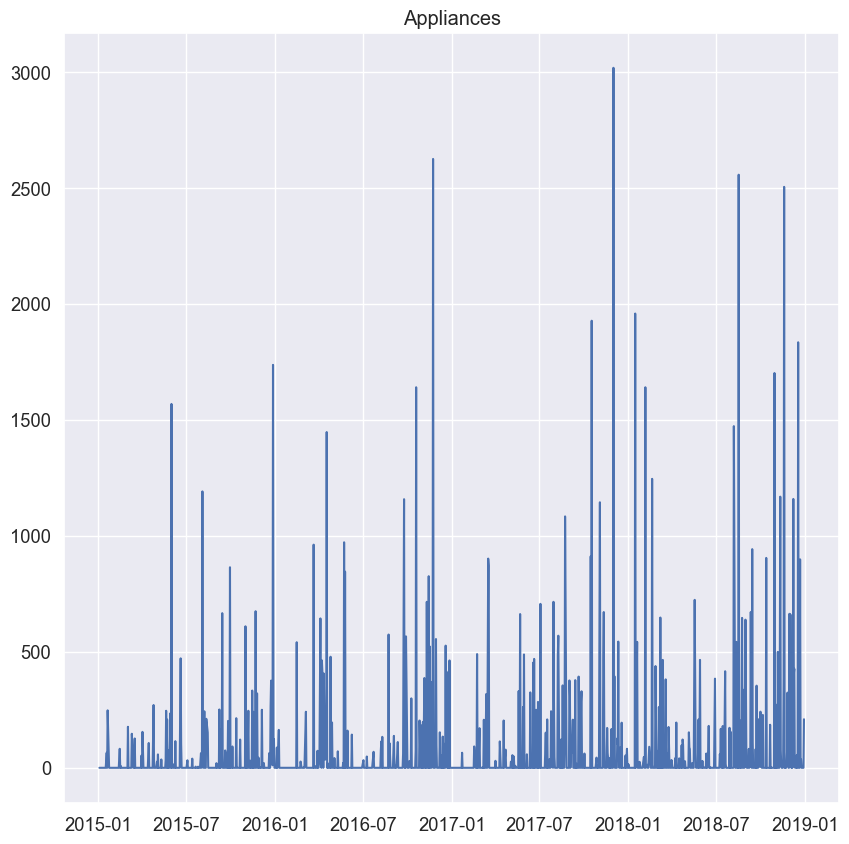

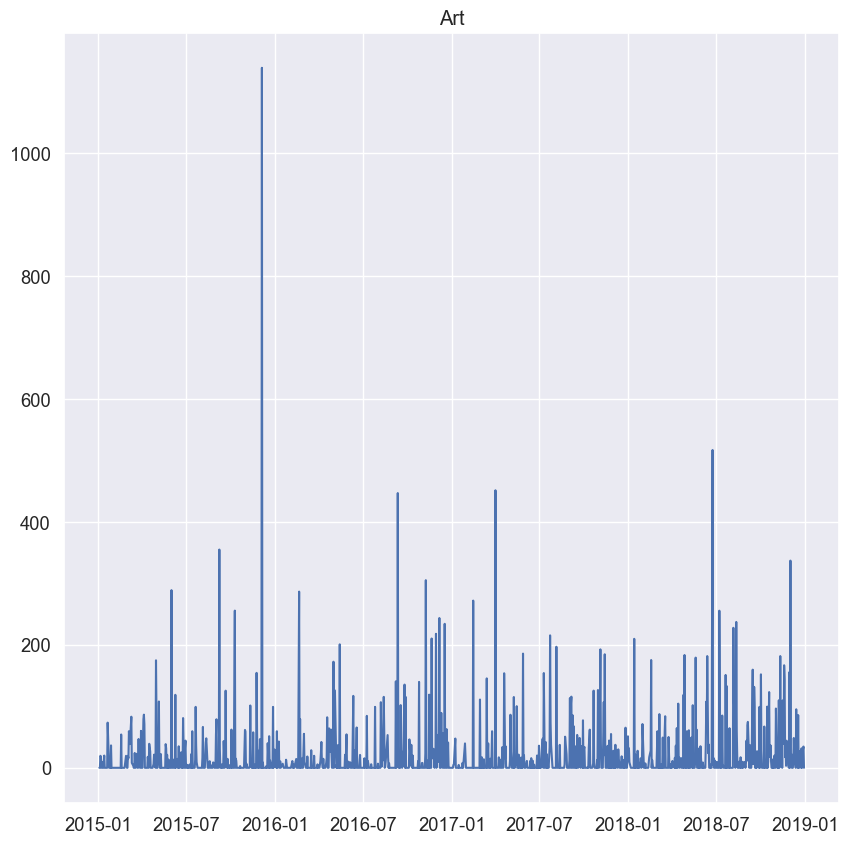

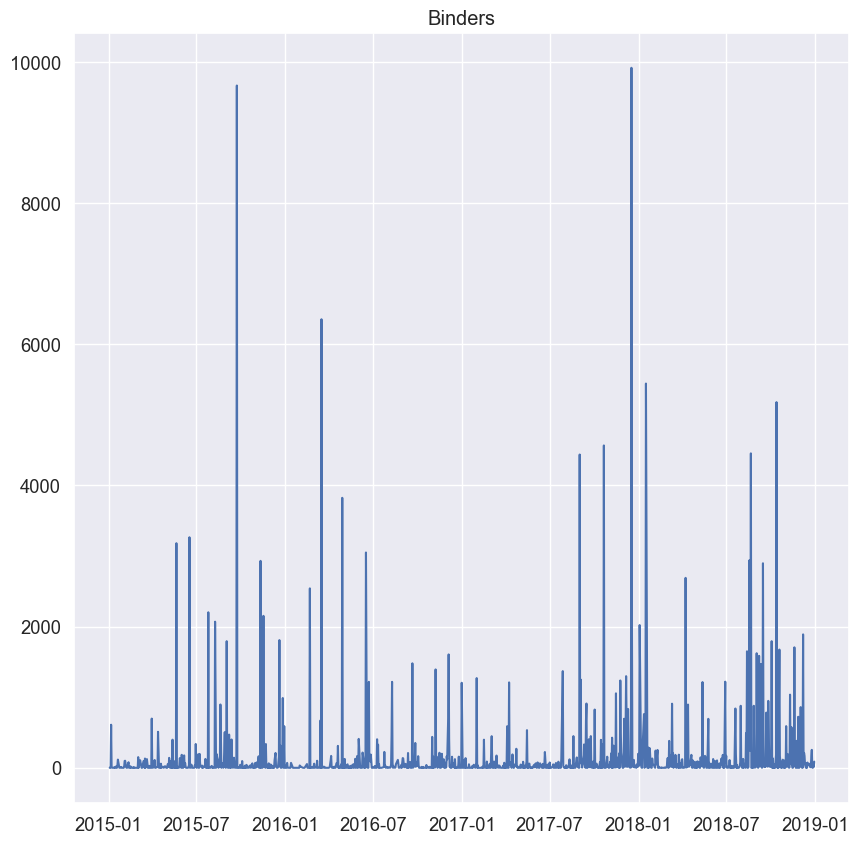

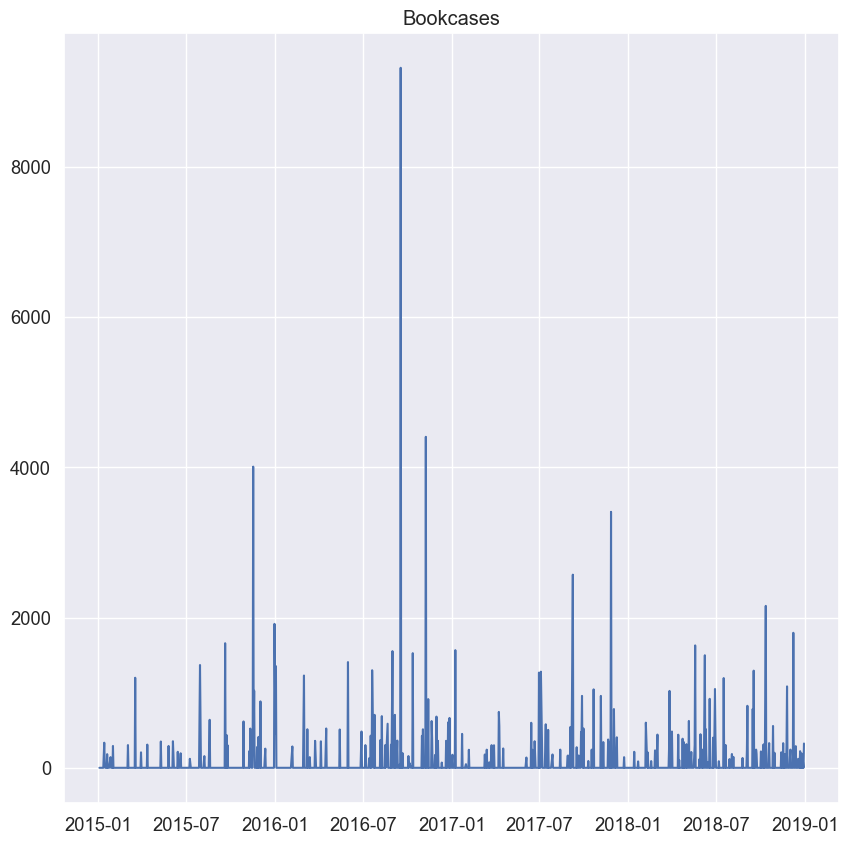

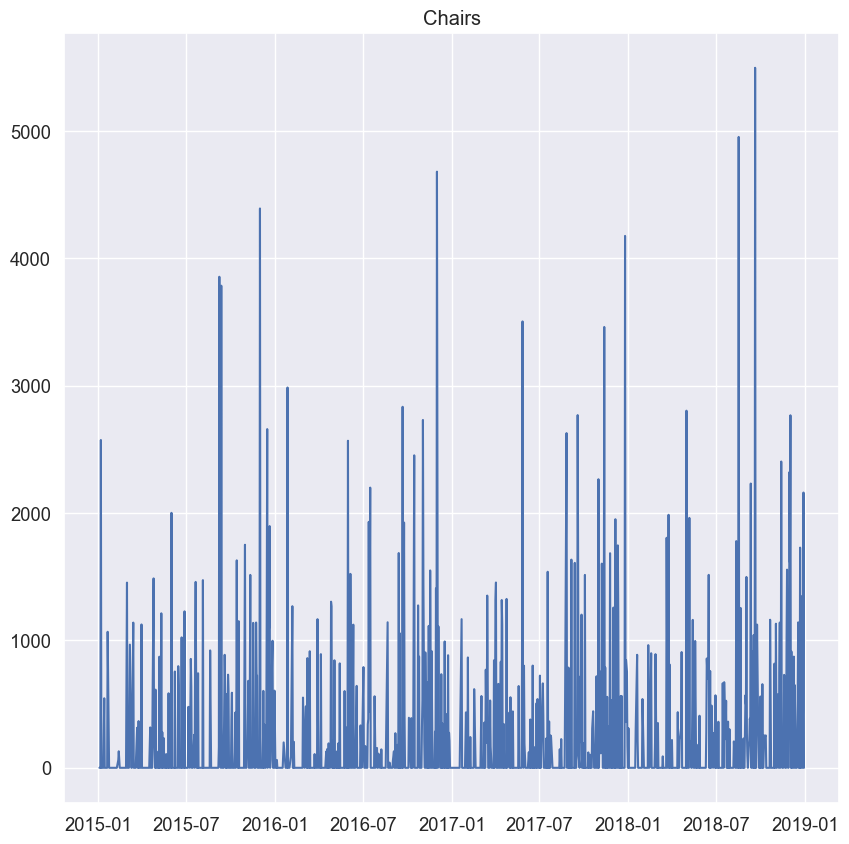

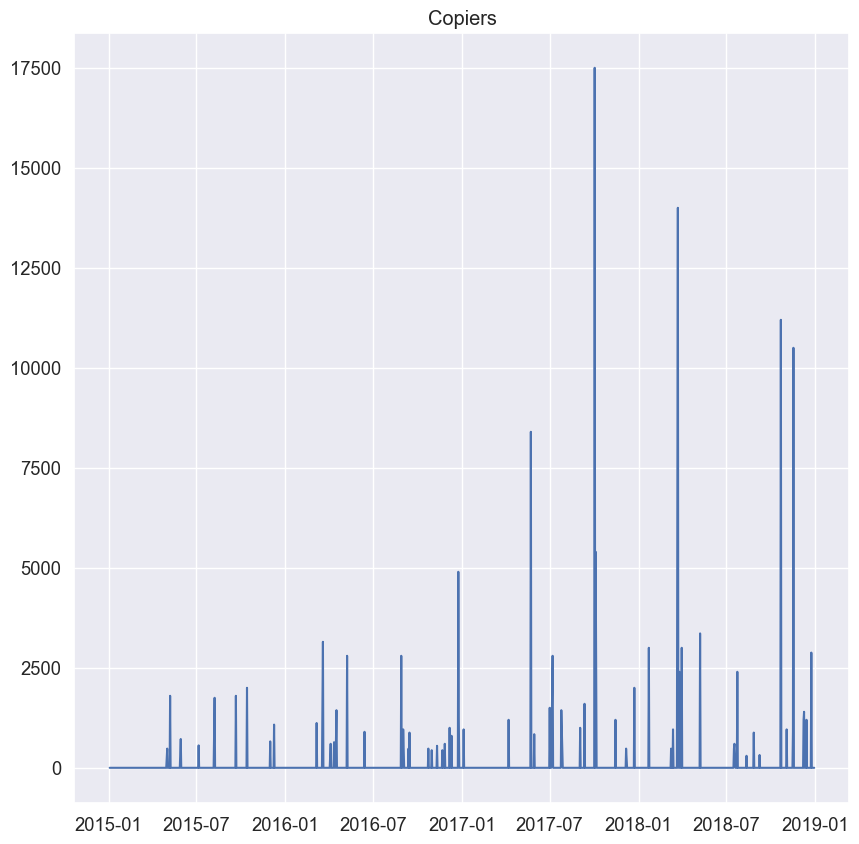

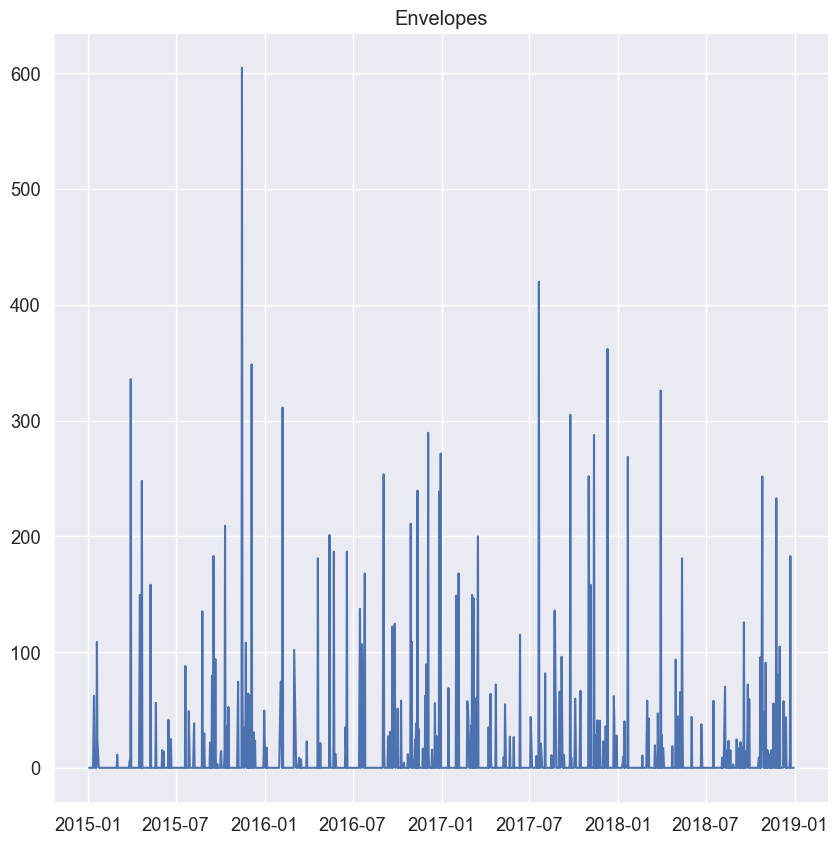

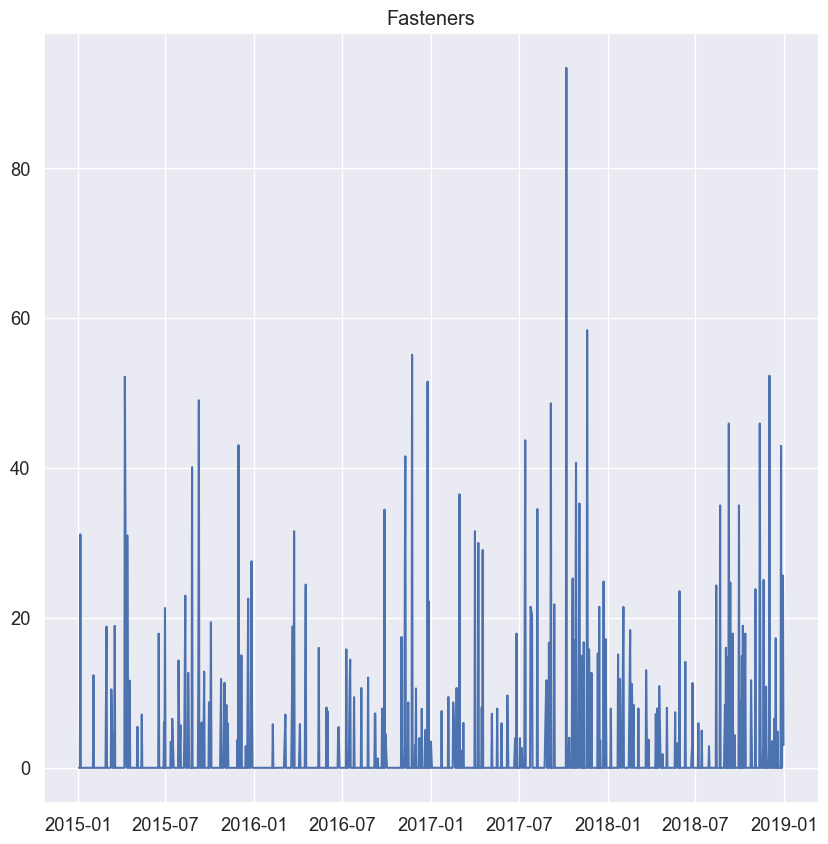

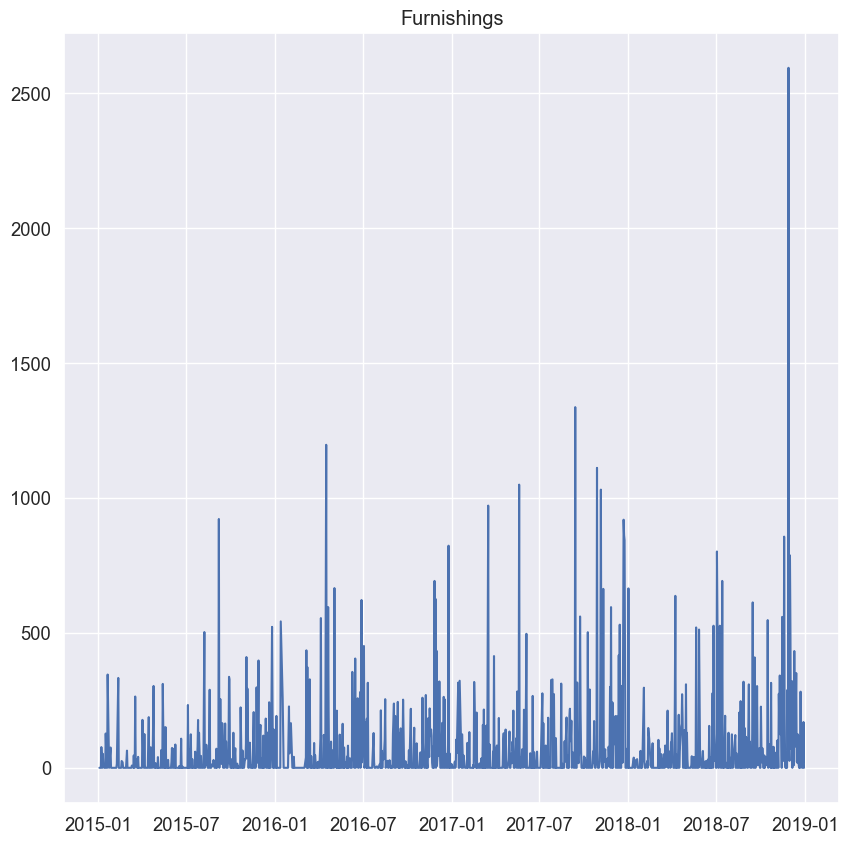

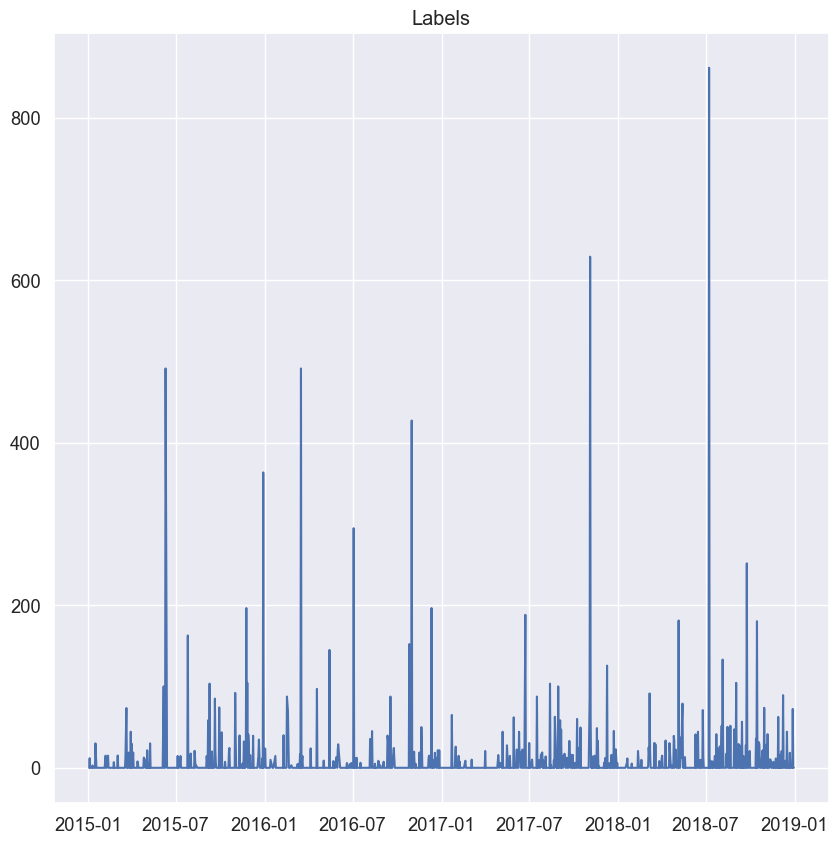

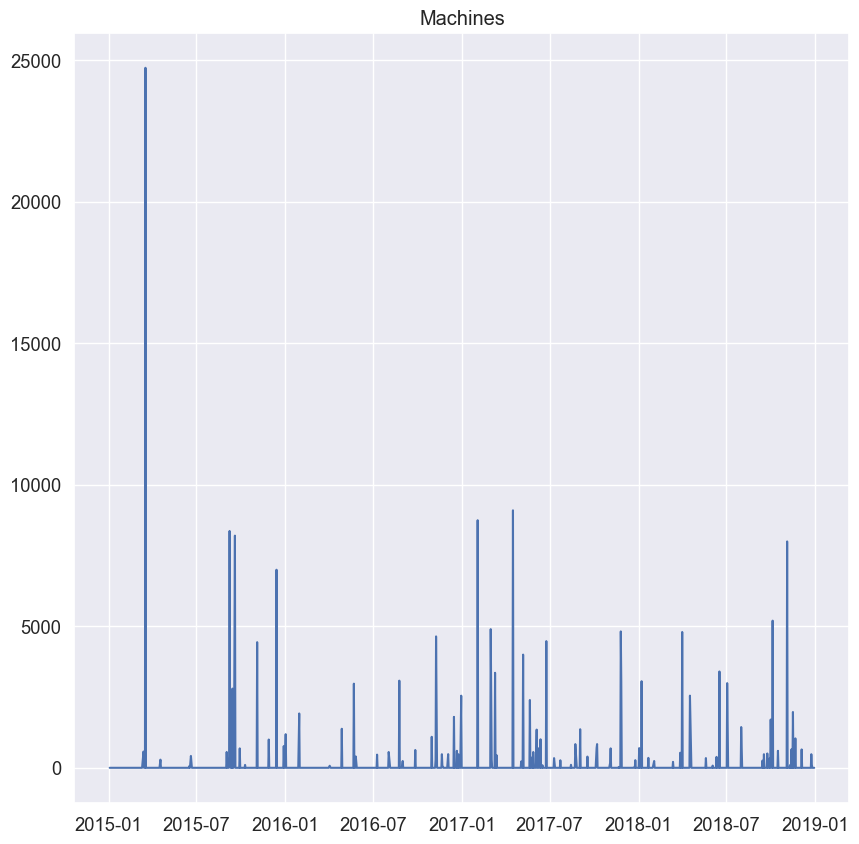

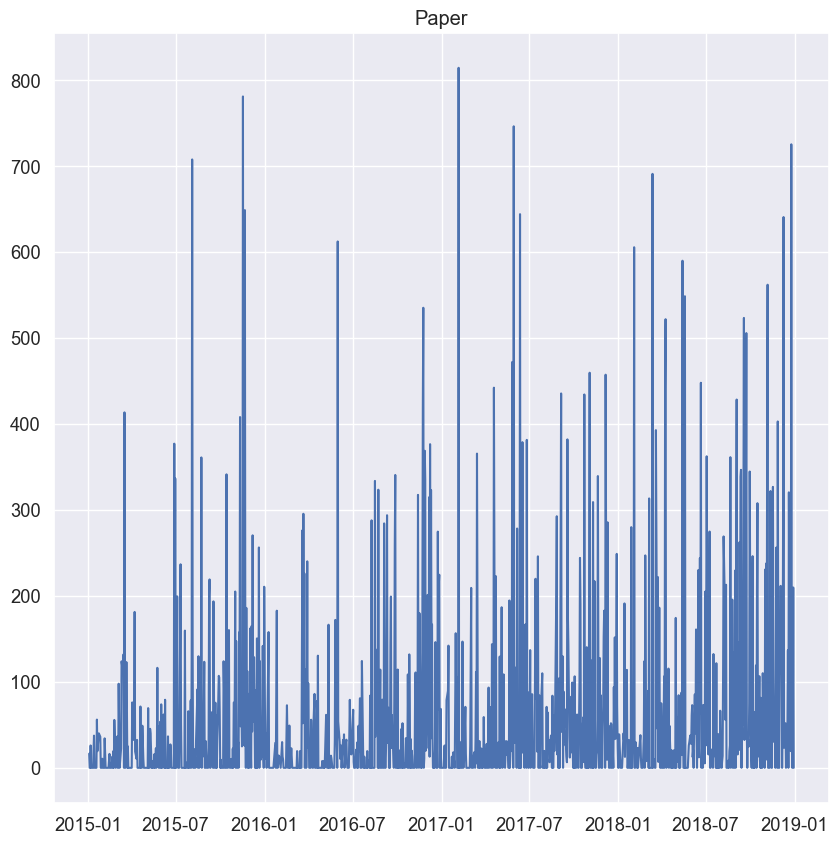

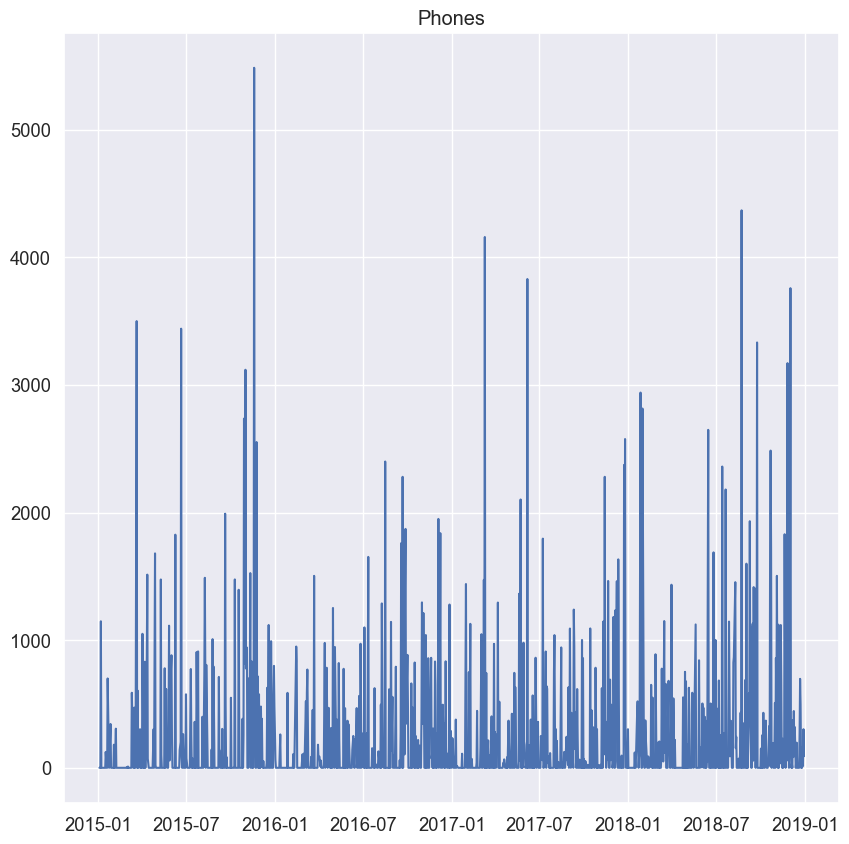

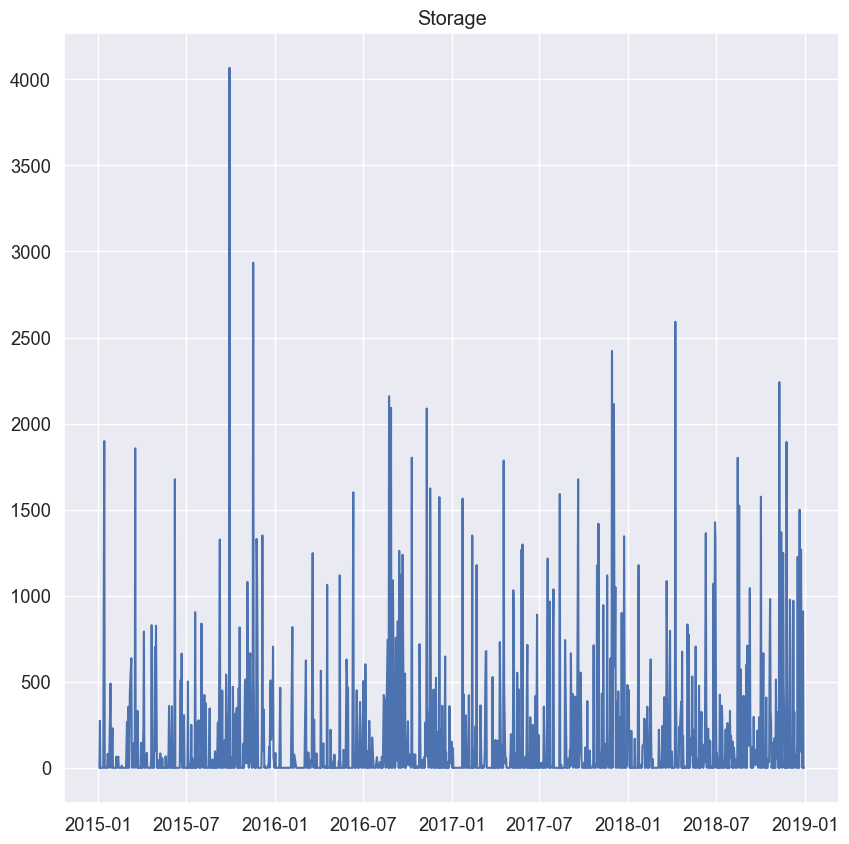

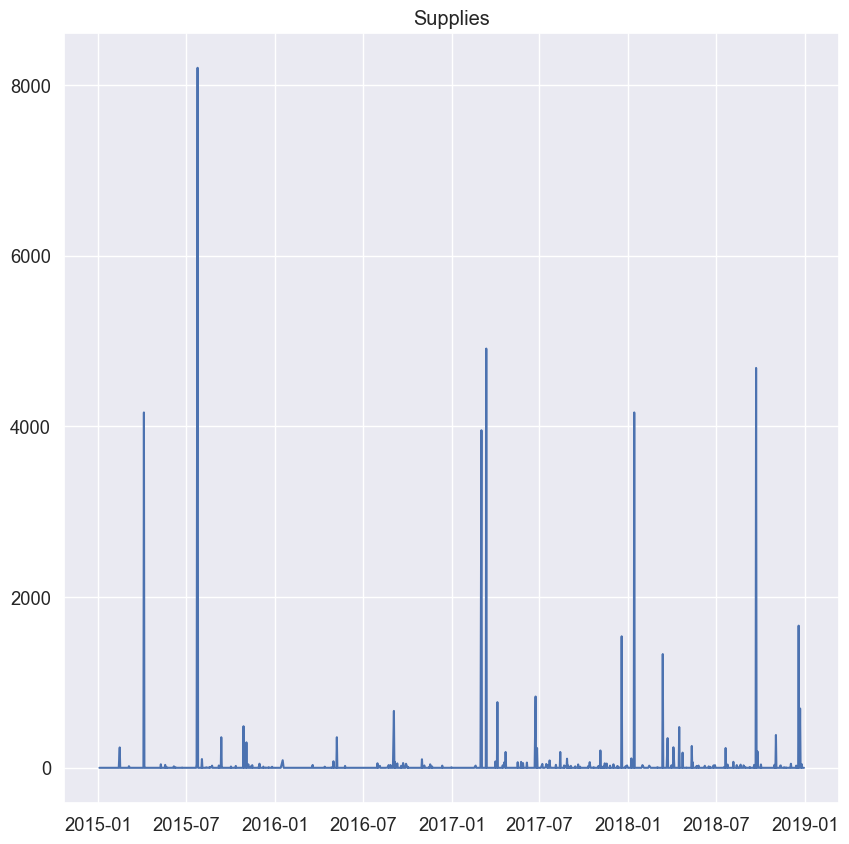

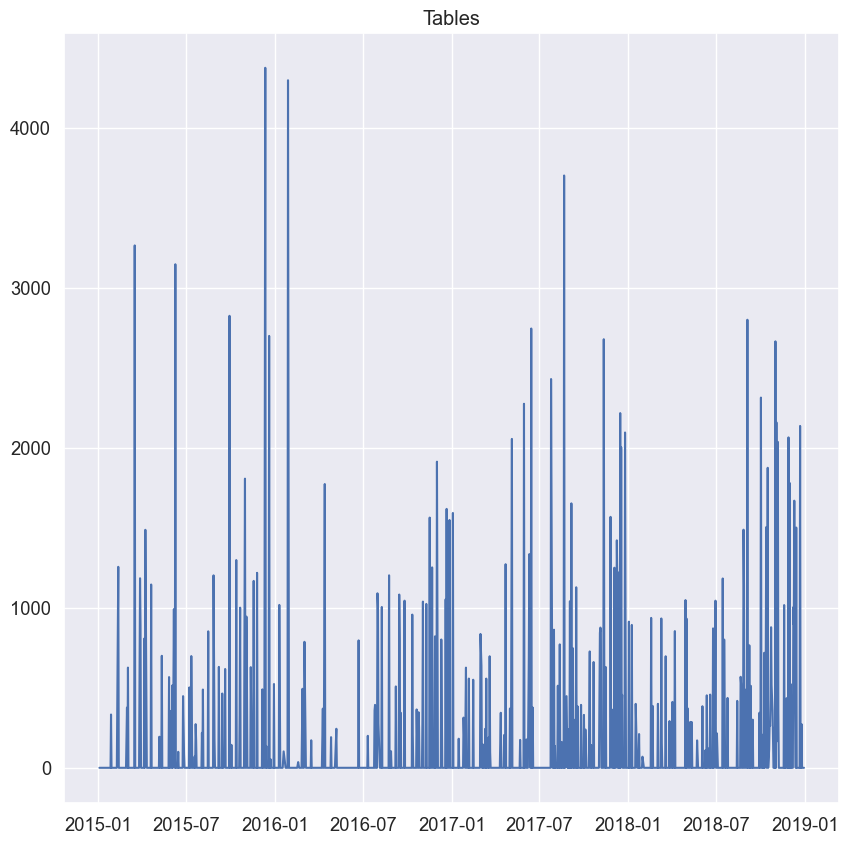

In [52]:
for column in total_sales_df.columns:
    plt.plot(total_sales_df[column])
    plt.title(column)
    plt.show()

In [53]:
# Summarize the Sales data by Category and Sub-Category
df_summary = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()
# Create a nested pie chart
fig = px.sunburst(
    df_summary,
    path=['Category', 'Sub-Category'],
    values='Sales',
)

fig.show()

In [54]:
# let's see the the behaviour during months
df['date']=pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str), format='%Y-%m')

In [55]:
monthly_sales=df.groupby('date')['Sales'].sum().reset_index()

In [56]:
px.line(data_frame=monthly_sales,x=monthly_sales['date'],y=monthly_sales['Sales'])

In [57]:
# Create a mapping for all 50 states 
all_state_mapping = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR",
    "California": "CA", "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE",
    "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL",
    "Indiana": "IN", "Iowa": "IA", "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA",
    "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN",
    "Mississippi": "MS", "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV",
    "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY",
    "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK",
    "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC",
    "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT",
    "Virginia": "VA", "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY"
}

# Add the all_state column to the DataFrame
df['all_state'] = df['State'].map(all_state_mapping)

# Group by state and calculate the sum of sales
sum_of_sales = df.groupby('State')['Sales'].sum().reset_index()

# Add all_state to sum_of_sales
sum_of_sales['all_state'] = sum_of_sales['State'].map(all_state_mapping)

# Create a choropleth map using Plotly
fig = go.Figure(data=go.Choropleth(
    locations=sum_of_sales['all_state'],
    locationmode='USA-states',
    z=sum_of_sales['Sales'],
    hoverinfo='location+z',
    showscale=True
))

fig.update_geos(projection_type="albers usa")
fig.update_layout(
    geo_scope='usa',
    title='Total Sales by U.S. State'
)

fig.show()

In [58]:
px.imshow(df.select_dtypes('number').corr(),text_auto=True,width=700,height=700)

In [59]:
#df.to_csv('df_sales.csv')

# RFM Model

## We are going to analysis the Customers based on below 3 factors:
* **R (Recency):** Number of days since last purchase
>compute max date then get diff and group to git min period <br><br>
* **F (Frequency):** Number of tracsactions 
> group cID then count invoice number  <br><br>
* **M (Monetary):** Total amount of transactions (revenue contributed) 
> sum to get total revenue then group by cID <br>

### Monetary (M)

In [60]:
Monetary = df.groupby(['CustomerID'])['Sales'].sum().reset_index().rename(columns = {'Sales' : 'Monetary'})

In [61]:
Monetary

CustomerID  Monetary
0     AA-10315  5563.560
1     AA-10375  1056.390
2     AA-10480  1790.512
3     AA-10645  5086.935
4     AB-10015   886.156
..         ...       ...
788   XP-21865  2374.658
789   YC-21895  5454.350
790   YS-21880  6720.444
791   ZC-21910  8025.707
792   ZD-21925  1493.944

[793 rows x 2 columns]

### Frequancy (F)

In [62]:
Frequancy = df.groupby(['CustomerID'])['index'].count().reset_index().rename(columns = {'index' : 'Frequancy'})

In [63]:
Frequancy

CustomerID  Frequancy
0     AA-10315         11
1     AA-10375         15
2     AA-10480         12
3     AA-10645         18
4     AB-10015          6
..         ...        ...
788   XP-21865         28
789   YC-21895          8
790   YS-21880         12
791   ZC-21910         31
792   ZD-21925          9

[793 rows x 2 columns]

### Recency (R)

In [64]:
max_date = df['OrderDate'].max()
max_date

Timestamp('2018-12-30 00:00:00')

In [65]:
df['Diff-Days'] = (max_date - df['OrderDate']).dt.days
df

index  OrderDate   ShipDate        ShipMode CustomerID    Segment  \
0         0 2017-11-08 2017-11-11    Second Class   CG-12520   Consumer   
1         1 2017-11-08 2017-11-11    Second Class   CG-12520   Consumer   
2         2 2017-06-12 2017-06-16    Second Class   DV-13045  Corporate   
3         3 2016-10-11 2016-10-18  Standard Class   SO-20335   Consumer   
4         4 2016-10-11 2016-10-18  Standard Class   SO-20335   Consumer   
...     ...        ...        ...             ...        ...        ...   
9795   9795 2017-05-21 2017-05-28  Standard Class   SH-19975  Corporate   
9796   9796 2016-01-12 2016-01-17  Standard Class   CS-12490  Corporate   
9797   9797 2016-01-12 2016-01-17  Standard Class   CS-12490  Corporate   
9798   9798 2016-01-12 2016-01-17  Standard Class   CS-12490  Corporate   
9799   9799 2016-01-12 2016-01-17  Standard Class   CS-12490  Corporate   

            Country             City       State   Region  ... response  Year  \
0     United States        Henderson    Kentucky    South  ...   3 days  2017   
1     United States        Henderson    Kentucky    South  ...   3 days  2017   
2     United States      Los Angeles  California     West  ...   4 days  2017   
3     United States  Fort Lauderdale     Florida    South  ...   7 days  2016   
4     United States  Fort Lauderdale     Florida    South  ...   7 days  2016   
...             ...              ...         ...      ...  ...      ...   ...   
9795  United States          Chicago    Illinois  Central  ...   7 days  2017   
9796  United States           Toledo        Ohio     East  ...   5 days  2016   
9797  United States           Toledo        Ohio     East  ...   5 days  2016   
9798  United States           Toledo        Ohio     East  ...   5 days  2016   
9799  United States           Toledo        Ohio     East  ...   5 days  2016   

      Month_Name   Day_Name  Month  Season log_sales       date all_state  \
0       November  Wednesday     11  Autumn  5.568192 2017-11-01        KY   
1       November  Wednesday     11  Autumn  6.595699 2017-11-01        KY   
2           June     Monday      6  Summer  2.682390 2017-06-01        CA   
3        October    Tuesday     10  Autumn  6.864407 2016-10-01        FL   
4        October    Tuesday     10  Autumn  3.107631 2016-10-01        FL   
...          ...        ...    ...     ...       ...        ...       ...   
9795         May     Sunday      5  Spring  1.334475 2017-05-01        IL   
9796     January    Tuesday      1  Winter  2.338724 2016-01-01        OH   
9797     January    Tuesday      1  Winter  5.460385 2016-01-01        OH   
9798     January    Tuesday      1  Winter  3.272455 2016-01-01        OH   
9799     January    Tuesday      1  Winter  2.340266 2016-01-01        OH   

      Diff-Days  
0           417  
1           417  
2           566  
3           810  
4           810  
...         ...  
9795        588  
9796       1083  
9797       1083  
9798       1083  
9799       1083  

[9800 rows x 23 columns]

In [66]:
Recency = df.groupby(['CustomerID'])['Diff-Days'].min().reset_index().rename(columns = {'Diff-Days' : 'Recency'})

In [67]:
Recency

CustomerID  Recency
0     AA-10315      184
1     AA-10375       19
2     AA-10480      259
3     AA-10645       55
4     AB-10015      415
..         ...      ...
788   XP-21865       43
789   YC-21895        4
790   YS-21880        9
791   ZC-21910       54
792   ZD-21925      202

[793 rows x 2 columns]

### Merge 3 Dataframes 

In [68]:
pd.merge(left=pd.merge(left=Recency , right=Frequancy , on = 'CustomerID' , how = 'inner') , 
        right=Monetary , on = 'CustomerID' , how = 'inner')

CustomerID  Recency  Frequancy  Monetary
0     AA-10315      184         11  5563.560
1     AA-10375       19         15  1056.390
2     AA-10480      259         12  1790.512
3     AA-10645       55         18  5086.935
4     AB-10015      415          6   886.156
..         ...      ...        ...       ...
788   XP-21865       43         28  2374.658
789   YC-21895        4          8  5454.350
790   YS-21880        9         12  6720.444
791   ZC-21910       54         31  8025.707
792   ZD-21925      202          9  1493.944

[793 rows x 4 columns]

In [69]:
merge1 = pd.merge(left=Recency , right=Frequancy , on = 'CustomerID' , how = 'inner')
merge1 

CustomerID  Recency  Frequancy
0     AA-10315      184         11
1     AA-10375       19         15
2     AA-10480      259         12
3     AA-10645       55         18
4     AB-10015      415          6
..         ...      ...        ...
788   XP-21865       43         28
789   YC-21895        4          8
790   YS-21880        9         12
791   ZC-21910       54         31
792   ZD-21925      202          9

[793 rows x 3 columns]

In [70]:
rfm = pd.merge(left=merge1 , right=Monetary , on = 'CustomerID' , how = 'inner')
rfm

CustomerID  Recency  Frequancy  Monetary
0     AA-10315      184         11  5563.560
1     AA-10375       19         15  1056.390
2     AA-10480      259         12  1790.512
3     AA-10645       55         18  5086.935
4     AB-10015      415          6   886.156
..         ...      ...        ...       ...
788   XP-21865       43         28  2374.658
789   YC-21895        4          8  5454.350
790   YS-21880        9         12  6720.444
791   ZC-21910       54         31  8025.707
792   ZD-21925      202          9  1493.944

[793 rows x 4 columns]

# Data preprocessing

In [71]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

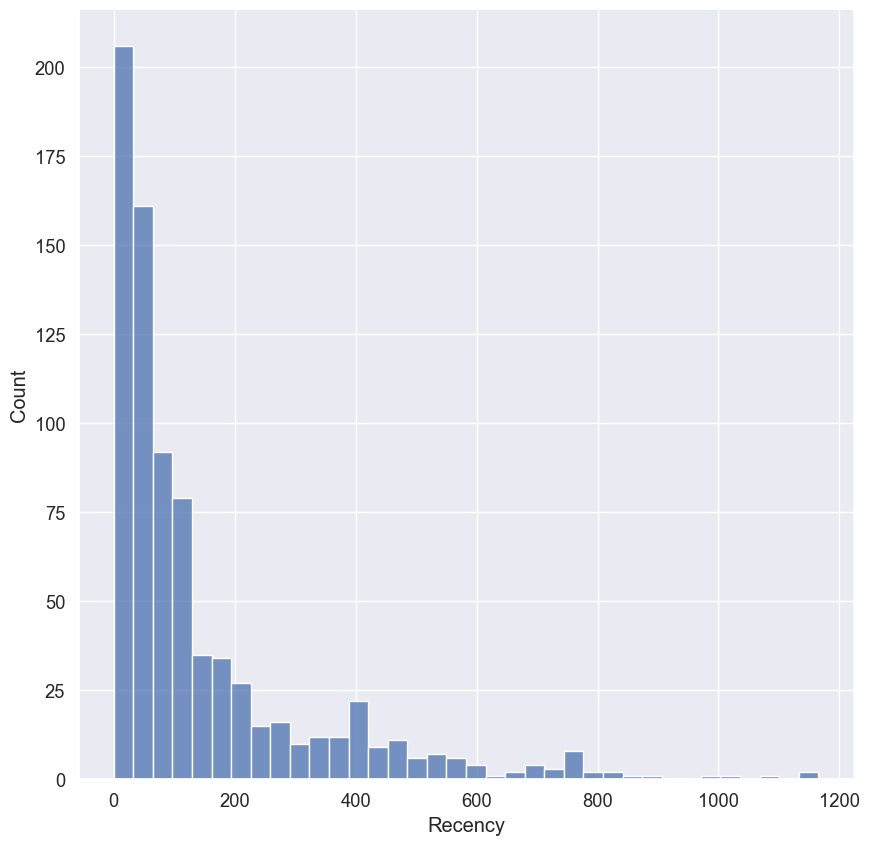

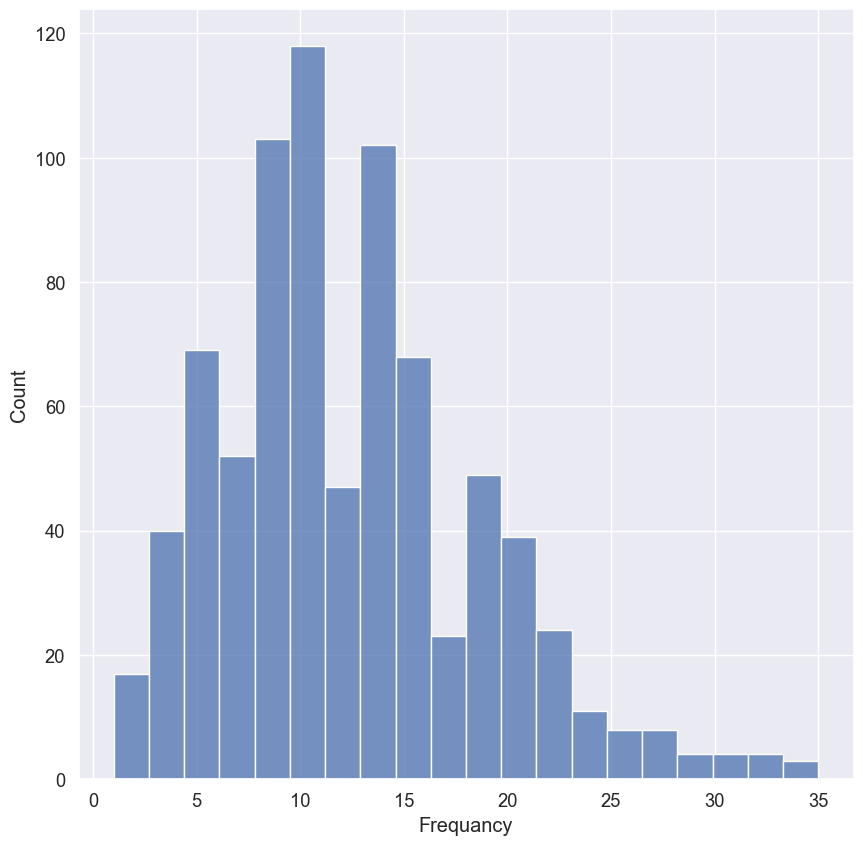

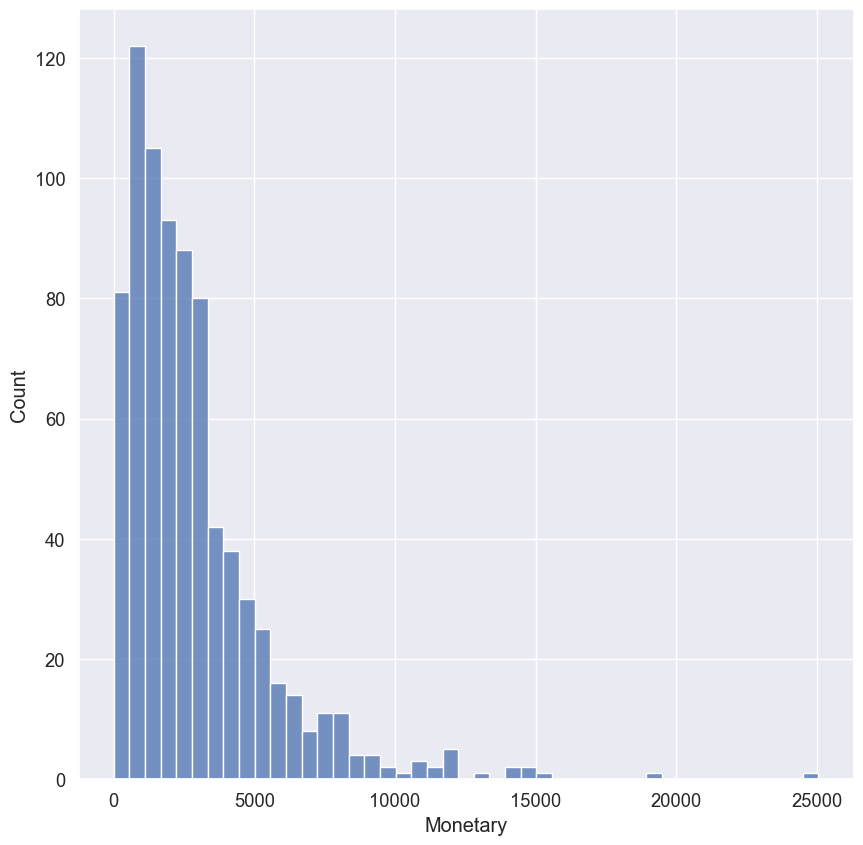

In [72]:
for col in rfm.select_dtypes('number').columns :
    
    plt.figure()
    sns.histplot(x =rfm[col])

In [73]:
rfm.describe()

Recency   Frequancy      Monetary
count   793.000000  793.000000    793.000000
mean    148.286255   12.358134   2851.874884
std     187.081466    6.162600   2620.668723
min       0.000000    1.000000      4.833000
25%      30.000000    8.000000   1081.466000
50%      75.000000   11.000000   2215.002000
75%     184.000000   16.000000   3670.258000
max    1165.000000   35.000000  25043.050000

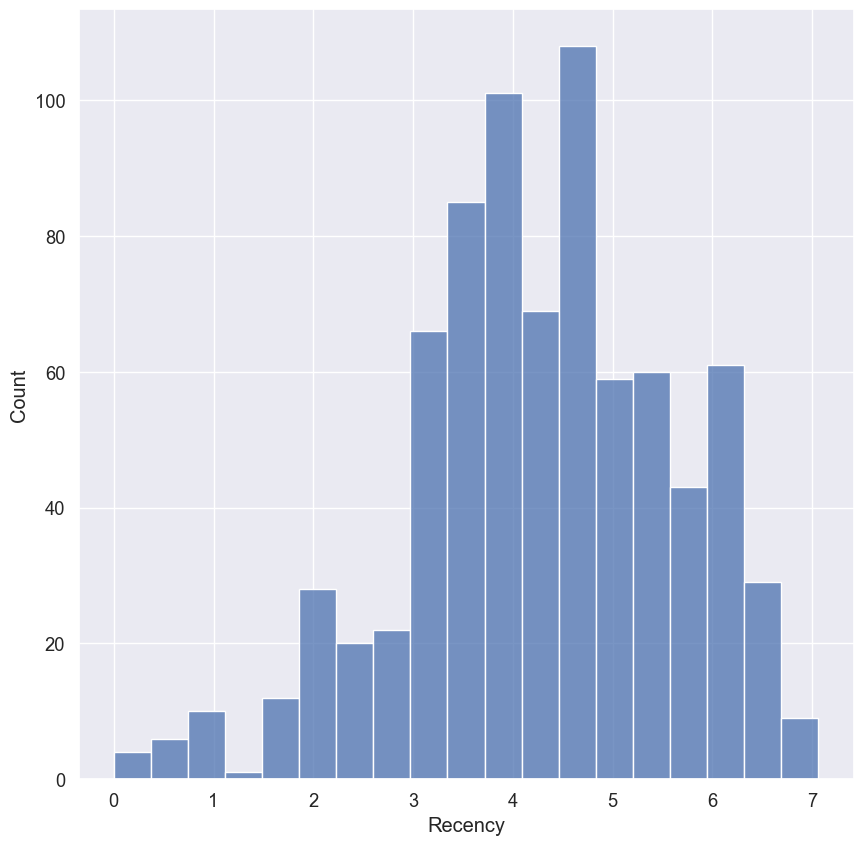

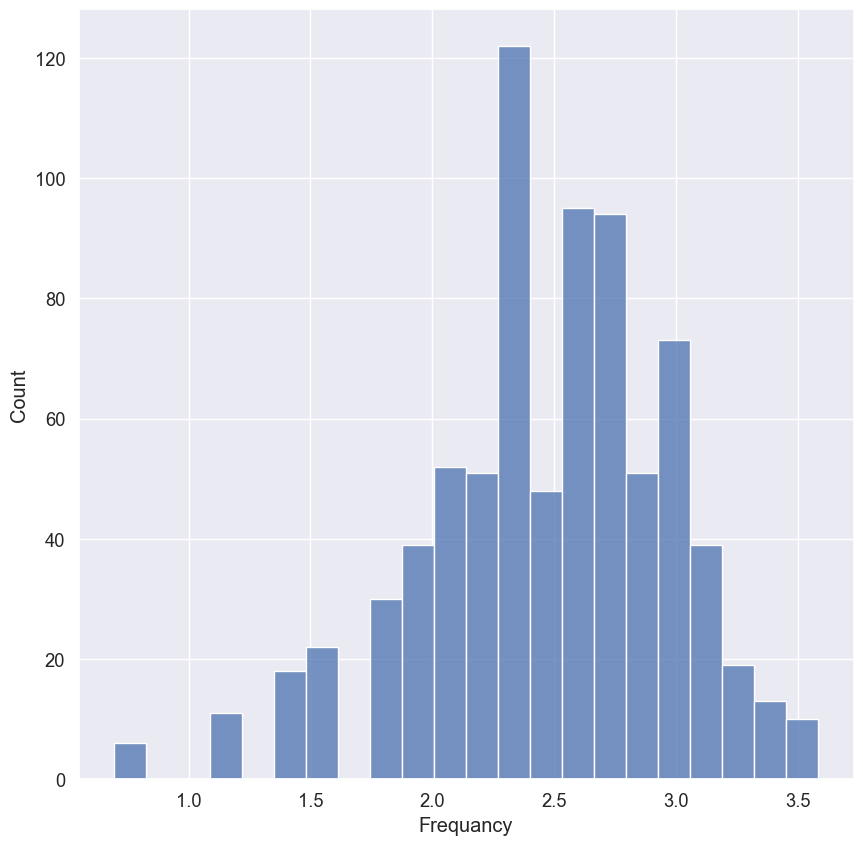

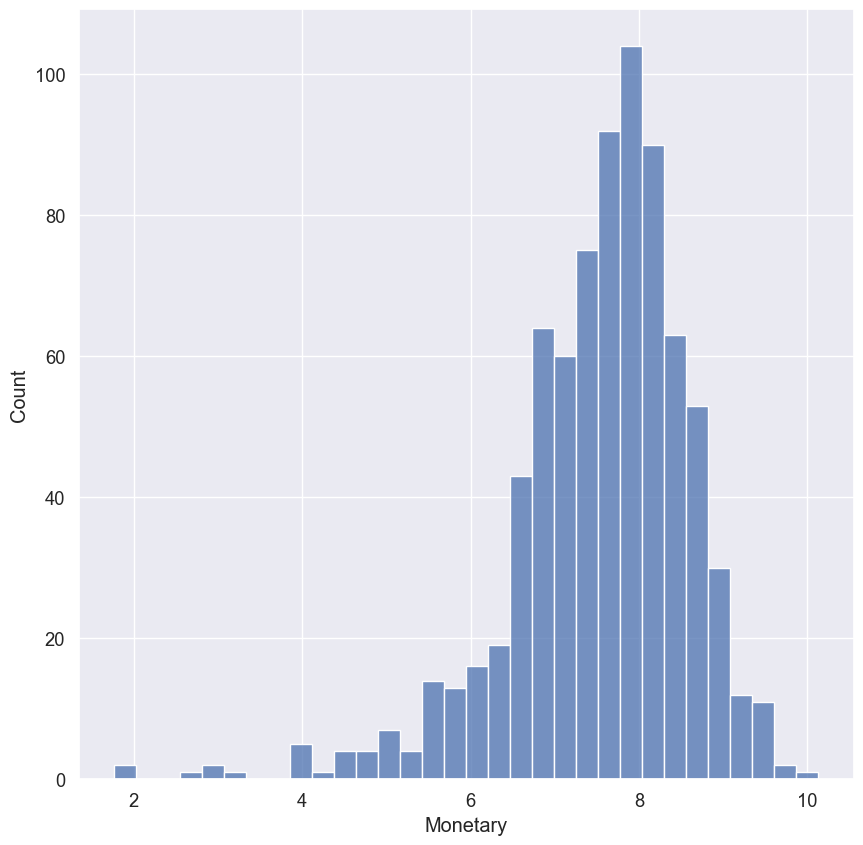

In [74]:
for col in rfm.select_dtypes('number').columns :
    
    plt.figure()
    sns.histplot(x =np.log1p(rfm[col]))
    

In [75]:
['Recency','Frequancy','Monetary']

['Recency', 'Frequancy', 'Monetary']

In [76]:
# trasnsformer work paralle to all col
transformer = ColumnTransformer(transformers=[
    ( 'log_transform' , FunctionTransformer(func=np.log1p) , ['Recency','Frequancy','Monetary'] )
] , remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('log_transform',
                                 FunctionTransformer(func=<ufunc 'log1p'>),
                                 ['Recency', 'Frequancy', 'Monetary'])])

In [77]:
rfm

CustomerID  Recency  Frequancy  Monetary
0     AA-10315      184         11  5563.560
1     AA-10375       19         15  1056.390
2     AA-10480      259         12  1790.512
3     AA-10645       55         18  5086.935
4     AB-10015      415          6   886.156
..         ...      ...        ...       ...
788   XP-21865       43         28  2374.658
789   YC-21895        4          8  5454.350
790   YS-21880        9         12  6720.444
791   ZC-21910       54         31  8025.707
792   ZD-21925      202          9  1493.944

[793 rows x 4 columns]

### Modeling  

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans , AgglomerativeClustering , DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline
from scipy.cluster.hierarchy import dendrogram , linkage
from kneed import KneeLocator

In [79]:
x = rfm[rfm.columns[1:]]

In [80]:
inrtia_lst , silhoutte_lst_kmeans , silhoutte_lst_h = [] , [] , []

for k in range(3 , 10):
    
    pl = make_pipeline(transformer,StandardScaler() , KMeans(n_clusters=k))
    pl_h = make_pipeline(transformer,StandardScaler() , AgglomerativeClustering(n_clusters=k))
    
    pl.fit(x)
    
    pl_h.fit(x)
    
    inrtia_lst.append(pl['kmeans'].inertia_)
    
    silhoutte_lst_kmeans.append(silhouette_score(x , pl['kmeans'].labels_))
    
    silhoutte_lst_h.append(silhouette_score(x , pl_h['agglomerativeclustering'].labels_))
    

C:\Users\XXX\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\XXX\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\XXX\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\XXX\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\XXX\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will 

In [81]:
px.line(x = range(3 , 10 ) , y = inrtia_lst)

In [82]:
KneeLocator(x = range(3 , 10) , y = inrtia_lst , curve='convex' , direction='decreasing').elbow

5

In [83]:
px.line(x = range(3 , 10) , y = silhoutte_lst_kmeans)

In [84]:
px.line(x = range(3 , 10) , y = silhoutte_lst_h)

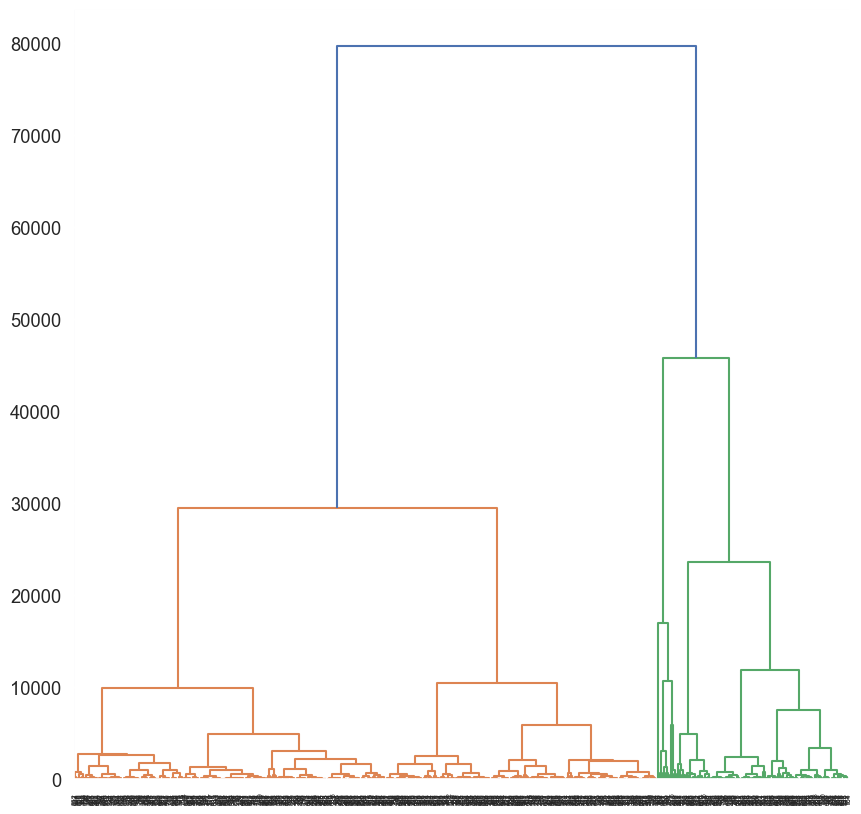

In [85]:
dend = dendrogram(linkage(x  , method = 'ward'))

In [86]:
#Trying DBSCAN
pl2= make_pipeline(transformer,StandardScaler() , DBSCAN())

In [87]:
pl2.fit(x)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log_transform',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['Recency', 'Frequancy',
                                                   'Monetary'])])),
                ('standardscaler', StandardScaler()), ('dbscan', DBSCAN())])

In [88]:
#seeing the number of clustring
set(pl.fit_predict(x))

C:\Users\XXX\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



{0, 1, 2, 3, 4, 5, 6, 7, 8}

In [89]:
# i choosed KMeans
pl = make_pipeline(transformer,StandardScaler() , KMeans(n_clusters=5))

In [90]:
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log_transform',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['Recency', 'Frequancy',
                                                   'Monetary'])])),
                ('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=5))])

In [91]:
rfm['Clusters'] = pl.fit_predict(rfm.select_dtypes('number'))

C:\Users\XXX\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [92]:
rfm

CustomerID  Recency  Frequancy  Monetary  Clusters
0     AA-10315      184         11  5563.560         0
1     AA-10375       19         15  1056.390         1
2     AA-10480      259         12  1790.512         3
3     AA-10645       55         18  5086.935         0
4     AB-10015      415          6   886.156         3
..         ...      ...        ...       ...       ...
788   XP-21865       43         28  2374.658         4
789   YC-21895        4          8  5454.350         4
790   YS-21880        9         12  6720.444         4
791   ZC-21910       54         31  8025.707         0
792   ZD-21925      202          9  1493.944         3

[793 rows x 5 columns]

In [93]:
rfm.describe()

Recency   Frequancy      Monetary    Clusters
count   793.000000  793.000000    793.000000  793.000000
mean    148.286255   12.358134   2851.874884    1.897856
std     187.081466    6.162600   2620.668723    1.548348
min       0.000000    1.000000      4.833000    0.000000
25%      30.000000    8.000000   1081.466000    0.000000
50%      75.000000   11.000000   2215.002000    2.000000
75%     184.000000   16.000000   3670.258000    3.000000
max    1165.000000   35.000000  25043.050000    4.000000

In [94]:
rfm.groupby('Clusters').sample()

CustomerID  Recency  Frequancy  Monetary  Clusters
443   KT-16465      391         14  3057.100         0
331   HR-14770       13          5   940.588         1
659   RS-19870       19          3    22.328         2
207   DJ-13420      637          5  2012.520         3
340   JB-15400        7         16  1791.605         4

In [95]:
rfm.groupby('Clusters').count()

CustomerID  Recency  Frequancy  Monetary
Clusters                                          
0                228      228        228       228
1                148      148        148       148
2                 56       56         56        56
3                199      199        199       199
4                162      162        162       162

In [96]:
rfm.describe()

Recency   Frequancy      Monetary    Clusters
count   793.000000  793.000000    793.000000  793.000000
mean    148.286255   12.358134   2851.874884    1.897856
std     187.081466    6.162600   2620.668723    1.548348
min       0.000000    1.000000      4.833000    0.000000
25%      30.000000    8.000000   1081.466000    0.000000
50%      75.000000   11.000000   2215.002000    2.000000
75%     184.000000   16.000000   3670.258000    3.000000
max    1165.000000   35.000000  25043.050000    4.000000

In [97]:
rfm.isna().sum()

CustomerID    0
Recency       0
Frequancy     0
Monetary      0
Clusters      0
dtype: int64

<Axes: xlabel='Clusters', ylabel='count'>

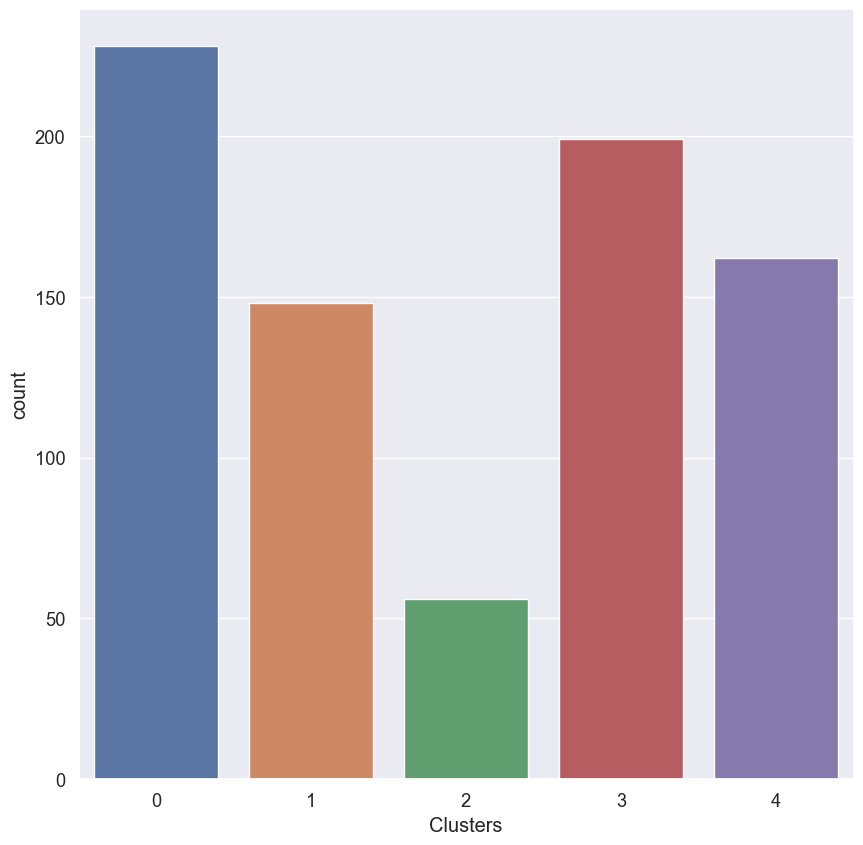

In [98]:
sns.countplot(data=rfm,x='Clusters')

In [99]:
rfm[rfm['Clusters'] == 0 ].describe()

Recency   Frequancy      Monetary  Clusters
count  228.000000  228.000000    228.000000     228.0
mean   137.429825   16.412281   4863.597826       0.0
std    120.784475    5.093507   3262.731076       0.0
min     36.000000    6.000000   1419.247000       0.0
25%     59.750000   13.000000   2820.184750       0.0
50%     97.000000   15.000000   3807.928000       0.0
75%    163.000000   19.000000   5700.208500       0.0
max    834.000000   34.000000  25043.050000       0.0

In [100]:
rfm[rfm['Clusters'] == 1 ].describe()

Recency   Frequancy     Monetary  Clusters
count  148.000000  148.000000   148.000000     148.0
mean    34.243243    8.641892  1403.731367       1.0
std     20.276531    2.507160   867.171213       0.0
min      0.000000    3.000000   146.940800       1.0
25%     19.000000    7.000000   780.107500       1.0
50%     34.000000    9.000000  1210.270000       1.0
75%     49.250000   10.000000  1846.172500       1.0
max     79.000000   16.000000  5253.876000       1.0

In [101]:
rfm[rfm['Clusters'] == 2 ].describe()

Recency  Frequancy    Monetary  Clusters
count    56.000000  56.000000   56.000000      56.0
mean    353.607143   3.732143  243.347446       2.0
std     280.168175   1.843821  193.265237       0.0
min      19.000000   1.000000    4.833000       2.0
25%     110.500000   2.000000   88.391500       2.0
50%     297.000000   3.500000  209.806500       2.0
75%     520.500000   5.000000  367.881000       2.0
max    1165.000000   8.000000  863.880000       2.0

In [102]:
rfm[rfm['Clusters'] == 3 ].describe()

Recency   Frequancy     Monetary  Clusters
count   199.000000  199.000000   199.000000     199.0
mean    292.206030    8.688442  1470.576817       3.0
std     212.085324    2.857458   769.302331       0.0
min      78.000000    2.000000   287.990000       3.0
25%     119.000000    7.000000   919.208000       3.0
50%     221.000000    8.000000  1300.031500       3.0
75%     406.500000   10.000000  1935.456000       3.0
max    1135.000000   17.000000  4432.138000       3.0

In [103]:
rfm[rfm['Clusters'] == 4 ].describe()

Recency   Frequancy      Monetary  Clusters
count  162.000000  162.000000    162.000000     162.0
mean    19.987654   17.537037   3942.049336       4.0
std     12.012410    5.274030   1941.260497       0.0
min      0.000000    8.000000   1137.616000       4.0
25%      9.000000   14.000000   2499.034000       4.0
50%     21.000000   16.500000   3327.327000       4.0
75%     29.000000   20.000000   4991.266500       4.0
max     43.000000   35.000000  12209.438000       4.0

In [104]:
#let's export this data and use BI tool to make more analysis on it 
#rfm.to_csv('Clusters.csv')

# Export The Model

In [105]:
import joblib

In [106]:
joblib.dump(pl, 'Model.h5')

['Model.h5']